# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

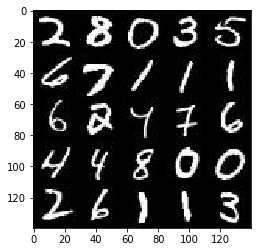

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

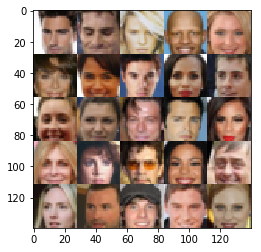

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.8.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real') 
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)

        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)

        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        x1 = tf.layers.dense(z, 7*7*256)
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, learning_rate_t = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    i = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                i += 1
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                batch_images = batch_images.reshape(batch_size, data_shape[1], data_shape[2], data_shape[3])
                batch_images = batch_images*2
            
                _ = sess.run(d_train_opt, feed_dict={input_real:batch_images, input_z:batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_real:batch_images, input_z:batch_z})
  
                if i%10 == 0:
                    train_loss_d = d_loss.eval({input_z:batch_z, input_real:batch_images})
                    train_loss_g = g_loss.eval({input_z:batch_z})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if i%100 == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.3903... Generator Loss: 0.6378
Epoch 1/2... Discriminator Loss: 4.2794... Generator Loss: 0.0584
Epoch 1/2... Discriminator Loss: 0.0214... Generator Loss: 4.5833
Epoch 1/2... Discriminator Loss: 0.0034... Generator Loss: 6.3155
Epoch 1/2... Discriminator Loss: 0.3595... Generator Loss: 12.9003
Epoch 1/2... Discriminator Loss: 2.2636... Generator Loss: 8.8360
Epoch 1/2... Discriminator Loss: 1.3349... Generator Loss: 1.2729
Epoch 1/2... Discriminator Loss: 0.0983... Generator Loss: 3.7323
Epoch 1/2... Discriminator Loss: 0.0175... Generator Loss: 6.3686
Epoch 1/2... Discriminator Loss: 0.0179... Generator Loss: 5.1666


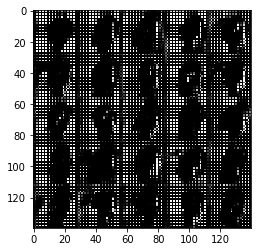

Epoch 1/2... Discriminator Loss: 0.0052... Generator Loss: 6.5116
Epoch 1/2... Discriminator Loss: 0.0018... Generator Loss: 6.8394
Epoch 1/2... Discriminator Loss: 0.0017... Generator Loss: 7.0948
Epoch 1/2... Discriminator Loss: 0.0008... Generator Loss: 8.1711
Epoch 1/2... Discriminator Loss: 0.0003... Generator Loss: 8.6984
Epoch 1/2... Discriminator Loss: 0.0037... Generator Loss: 8.8968
Epoch 1/2... Discriminator Loss: 0.0006... Generator Loss: 8.1057
Epoch 1/2... Discriminator Loss: 0.0017... Generator Loss: 8.3408
Epoch 1/2... Discriminator Loss: 2.2259... Generator Loss: 1.7288
Epoch 1/2... Discriminator Loss: 1.7799... Generator Loss: 1.7244


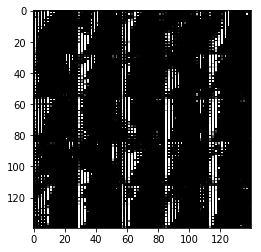

Epoch 1/2... Discriminator Loss: 0.0092... Generator Loss: 18.2009
Epoch 1/2... Discriminator Loss: 0.0628... Generator Loss: 10.0716
Epoch 1/2... Discriminator Loss: 0.2257... Generator Loss: 2.3110
Epoch 1/2... Discriminator Loss: 1.2605... Generator Loss: 1.0303
Epoch 1/2... Discriminator Loss: 0.2170... Generator Loss: 2.8629
Epoch 1/2... Discriminator Loss: 0.3351... Generator Loss: 2.5418
Epoch 1/2... Discriminator Loss: 1.0575... Generator Loss: 1.4880
Epoch 1/2... Discriminator Loss: 0.6633... Generator Loss: 2.2681
Epoch 1/2... Discriminator Loss: 1.1226... Generator Loss: 2.0688
Epoch 1/2... Discriminator Loss: 1.5387... Generator Loss: 0.5968


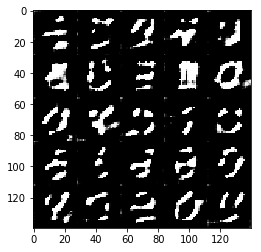

Epoch 1/2... Discriminator Loss: 1.3515... Generator Loss: 2.8745
Epoch 1/2... Discriminator Loss: 0.5693... Generator Loss: 3.3861
Epoch 1/2... Discriminator Loss: 0.9023... Generator Loss: 2.0314
Epoch 1/2... Discriminator Loss: 0.5148... Generator Loss: 2.3381
Epoch 1/2... Discriminator Loss: 1.9960... Generator Loss: 0.2787
Epoch 1/2... Discriminator Loss: 0.5434... Generator Loss: 1.9742
Epoch 1/2... Discriminator Loss: 1.4400... Generator Loss: 3.7238
Epoch 1/2... Discriminator Loss: 1.6912... Generator Loss: 0.5168
Epoch 1/2... Discriminator Loss: 0.4042... Generator Loss: 2.3183
Epoch 1/2... Discriminator Loss: 0.8178... Generator Loss: 4.2085


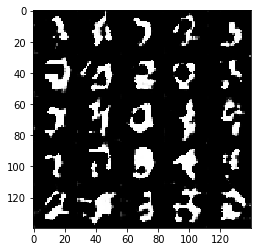

Epoch 1/2... Discriminator Loss: 1.0502... Generator Loss: 4.7962
Epoch 1/2... Discriminator Loss: 0.4263... Generator Loss: 1.7228
Epoch 1/2... Discriminator Loss: 1.5487... Generator Loss: 0.3331
Epoch 1/2... Discriminator Loss: 0.0666... Generator Loss: 3.9611
Epoch 1/2... Discriminator Loss: 2.4873... Generator Loss: 7.8024
Epoch 1/2... Discriminator Loss: 1.7883... Generator Loss: 0.3479
Epoch 1/2... Discriminator Loss: 0.5112... Generator Loss: 1.3618
Epoch 1/2... Discriminator Loss: 1.9323... Generator Loss: 0.3349
Epoch 1/2... Discriminator Loss: 1.2197... Generator Loss: 1.4029
Epoch 1/2... Discriminator Loss: 1.4557... Generator Loss: 0.9925


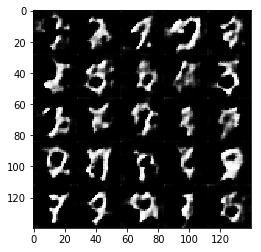

Epoch 1/2... Discriminator Loss: 1.3940... Generator Loss: 0.8706
Epoch 1/2... Discriminator Loss: 1.0793... Generator Loss: 0.8119
Epoch 1/2... Discriminator Loss: 1.3112... Generator Loss: 0.8199
Epoch 1/2... Discriminator Loss: 1.5522... Generator Loss: 0.3944
Epoch 1/2... Discriminator Loss: 1.3767... Generator Loss: 1.1085
Epoch 1/2... Discriminator Loss: 1.1217... Generator Loss: 1.6941
Epoch 1/2... Discriminator Loss: 1.1130... Generator Loss: 0.8144
Epoch 1/2... Discriminator Loss: 1.3494... Generator Loss: 0.6827
Epoch 1/2... Discriminator Loss: 0.9071... Generator Loss: 1.0020
Epoch 1/2... Discriminator Loss: 1.0566... Generator Loss: 1.6271


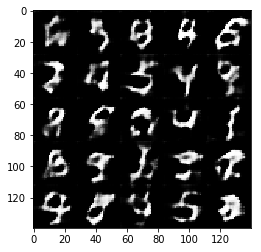

Epoch 1/2... Discriminator Loss: 0.8681... Generator Loss: 0.9721
Epoch 1/2... Discriminator Loss: 0.8897... Generator Loss: 0.8362
Epoch 1/2... Discriminator Loss: 0.9094... Generator Loss: 1.2759
Epoch 1/2... Discriminator Loss: 1.2894... Generator Loss: 0.6210
Epoch 1/2... Discriminator Loss: 1.1935... Generator Loss: 1.6876
Epoch 1/2... Discriminator Loss: 0.8879... Generator Loss: 1.1156
Epoch 1/2... Discriminator Loss: 1.0568... Generator Loss: 2.0273
Epoch 1/2... Discriminator Loss: 1.7886... Generator Loss: 0.3403
Epoch 1/2... Discriminator Loss: 0.9129... Generator Loss: 0.8357
Epoch 1/2... Discriminator Loss: 1.1678... Generator Loss: 0.6658


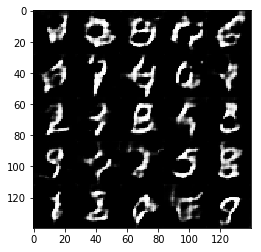

Epoch 1/2... Discriminator Loss: 0.9653... Generator Loss: 0.7017
Epoch 1/2... Discriminator Loss: 1.1408... Generator Loss: 0.7915
Epoch 1/2... Discriminator Loss: 1.1206... Generator Loss: 0.6727
Epoch 1/2... Discriminator Loss: 1.0049... Generator Loss: 0.7605
Epoch 1/2... Discriminator Loss: 1.0759... Generator Loss: 2.3320
Epoch 1/2... Discriminator Loss: 1.1942... Generator Loss: 1.3434
Epoch 1/2... Discriminator Loss: 1.3423... Generator Loss: 2.7343
Epoch 1/2... Discriminator Loss: 1.0924... Generator Loss: 1.3435
Epoch 1/2... Discriminator Loss: 0.9887... Generator Loss: 1.1216
Epoch 1/2... Discriminator Loss: 0.9178... Generator Loss: 0.9955


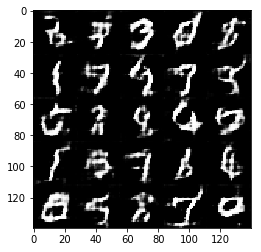

Epoch 1/2... Discriminator Loss: 1.0366... Generator Loss: 1.6884
Epoch 1/2... Discriminator Loss: 1.1179... Generator Loss: 1.2672
Epoch 1/2... Discriminator Loss: 0.8513... Generator Loss: 1.1536
Epoch 1/2... Discriminator Loss: 1.4104... Generator Loss: 0.4879
Epoch 1/2... Discriminator Loss: 1.0063... Generator Loss: 0.8336
Epoch 1/2... Discriminator Loss: 1.3129... Generator Loss: 0.5028
Epoch 1/2... Discriminator Loss: 0.6943... Generator Loss: 1.8575
Epoch 1/2... Discriminator Loss: 1.0083... Generator Loss: 0.8311
Epoch 1/2... Discriminator Loss: 1.0329... Generator Loss: 0.7584
Epoch 1/2... Discriminator Loss: 1.0847... Generator Loss: 0.7652


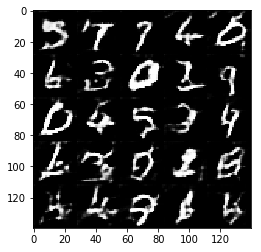

Epoch 1/2... Discriminator Loss: 1.7702... Generator Loss: 0.3355
Epoch 1/2... Discriminator Loss: 0.8648... Generator Loss: 0.9038
Epoch 1/2... Discriminator Loss: 0.8780... Generator Loss: 0.9958
Epoch 1/2... Discriminator Loss: 0.8437... Generator Loss: 1.4381
Epoch 1/2... Discriminator Loss: 1.1497... Generator Loss: 0.9794
Epoch 1/2... Discriminator Loss: 1.1075... Generator Loss: 0.6961
Epoch 1/2... Discriminator Loss: 0.9737... Generator Loss: 0.8928
Epoch 1/2... Discriminator Loss: 1.0227... Generator Loss: 1.2510
Epoch 1/2... Discriminator Loss: 0.8829... Generator Loss: 1.0345
Epoch 1/2... Discriminator Loss: 1.0385... Generator Loss: 1.0159


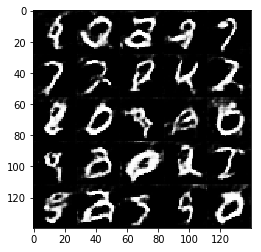

Epoch 1/2... Discriminator Loss: 0.9623... Generator Loss: 0.7366
Epoch 1/2... Discriminator Loss: 1.1186... Generator Loss: 0.6690
Epoch 1/2... Discriminator Loss: 1.3461... Generator Loss: 1.3480
Epoch 1/2... Discriminator Loss: 1.3286... Generator Loss: 0.4731
Epoch 1/2... Discriminator Loss: 1.1464... Generator Loss: 1.3731
Epoch 1/2... Discriminator Loss: 0.8566... Generator Loss: 2.3944
Epoch 1/2... Discriminator Loss: 1.3934... Generator Loss: 0.4883
Epoch 1/2... Discriminator Loss: 1.0205... Generator Loss: 0.9722
Epoch 1/2... Discriminator Loss: 0.9818... Generator Loss: 0.8523
Epoch 1/2... Discriminator Loss: 1.3740... Generator Loss: 0.4754


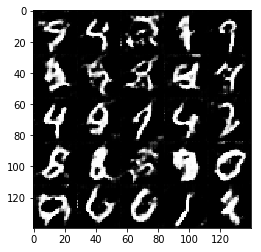

Epoch 1/2... Discriminator Loss: 1.1999... Generator Loss: 1.3013
Epoch 1/2... Discriminator Loss: 1.3354... Generator Loss: 0.5506
Epoch 1/2... Discriminator Loss: 1.2121... Generator Loss: 2.3505
Epoch 1/2... Discriminator Loss: 1.4382... Generator Loss: 0.3907
Epoch 1/2... Discriminator Loss: 1.1677... Generator Loss: 0.4901
Epoch 1/2... Discriminator Loss: 1.5844... Generator Loss: 0.3796
Epoch 1/2... Discriminator Loss: 1.7677... Generator Loss: 0.3060
Epoch 1/2... Discriminator Loss: 1.8109... Generator Loss: 0.2874
Epoch 1/2... Discriminator Loss: 1.2420... Generator Loss: 0.5525
Epoch 1/2... Discriminator Loss: 0.8594... Generator Loss: 1.1398


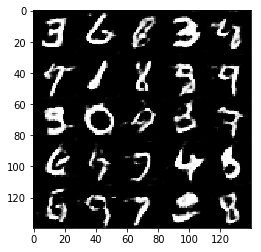

Epoch 1/2... Discriminator Loss: 2.5313... Generator Loss: 0.1171
Epoch 1/2... Discriminator Loss: 0.6846... Generator Loss: 1.1137
Epoch 1/2... Discriminator Loss: 1.9956... Generator Loss: 0.2284
Epoch 1/2... Discriminator Loss: 0.8451... Generator Loss: 0.9449
Epoch 1/2... Discriminator Loss: 0.7710... Generator Loss: 1.4149
Epoch 1/2... Discriminator Loss: 2.1544... Generator Loss: 0.1589
Epoch 1/2... Discriminator Loss: 0.9125... Generator Loss: 0.8269
Epoch 1/2... Discriminator Loss: 0.6166... Generator Loss: 1.5640
Epoch 1/2... Discriminator Loss: 1.5034... Generator Loss: 1.9619
Epoch 1/2... Discriminator Loss: 0.7672... Generator Loss: 1.5366


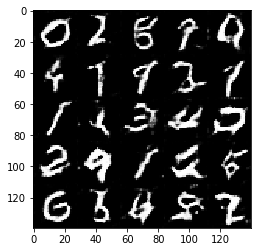

Epoch 1/2... Discriminator Loss: 1.2682... Generator Loss: 0.5063
Epoch 1/2... Discriminator Loss: 0.9038... Generator Loss: 1.1349
Epoch 1/2... Discriminator Loss: 0.6304... Generator Loss: 2.0448
Epoch 1/2... Discriminator Loss: 0.7526... Generator Loss: 1.7442
Epoch 1/2... Discriminator Loss: 1.5186... Generator Loss: 3.2395
Epoch 1/2... Discriminator Loss: 0.9418... Generator Loss: 0.9476
Epoch 1/2... Discriminator Loss: 1.2301... Generator Loss: 0.5574
Epoch 1/2... Discriminator Loss: 1.1045... Generator Loss: 1.1812
Epoch 1/2... Discriminator Loss: 1.0812... Generator Loss: 0.8277
Epoch 1/2... Discriminator Loss: 1.0051... Generator Loss: 1.5979


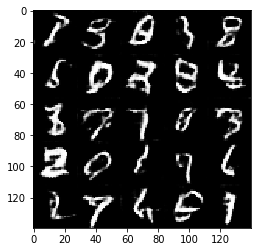

Epoch 1/2... Discriminator Loss: 1.0591... Generator Loss: 0.7093
Epoch 1/2... Discriminator Loss: 0.9695... Generator Loss: 0.9975
Epoch 1/2... Discriminator Loss: 0.8588... Generator Loss: 0.9839
Epoch 1/2... Discriminator Loss: 0.8106... Generator Loss: 0.8974
Epoch 1/2... Discriminator Loss: 1.5679... Generator Loss: 0.4418
Epoch 1/2... Discriminator Loss: 0.5374... Generator Loss: 1.4122
Epoch 1/2... Discriminator Loss: 1.4851... Generator Loss: 0.4192
Epoch 1/2... Discriminator Loss: 1.4444... Generator Loss: 0.4855
Epoch 1/2... Discriminator Loss: 1.4180... Generator Loss: 0.4264
Epoch 1/2... Discriminator Loss: 0.7284... Generator Loss: 1.6895


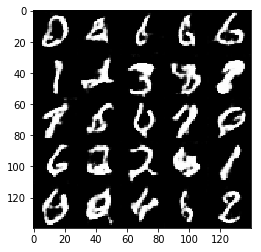

Epoch 1/2... Discriminator Loss: 2.3587... Generator Loss: 0.1603
Epoch 1/2... Discriminator Loss: 1.0665... Generator Loss: 0.6996
Epoch 1/2... Discriminator Loss: 1.6874... Generator Loss: 0.3488
Epoch 1/2... Discriminator Loss: 1.2920... Generator Loss: 1.4446
Epoch 1/2... Discriminator Loss: 0.7371... Generator Loss: 2.0254
Epoch 1/2... Discriminator Loss: 2.0355... Generator Loss: 0.1848
Epoch 1/2... Discriminator Loss: 1.0439... Generator Loss: 0.7586
Epoch 1/2... Discriminator Loss: 0.9986... Generator Loss: 1.5090
Epoch 1/2... Discriminator Loss: 1.0189... Generator Loss: 0.7096
Epoch 1/2... Discriminator Loss: 1.6871... Generator Loss: 0.3529


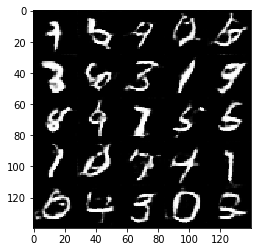

Epoch 1/2... Discriminator Loss: 1.1343... Generator Loss: 0.7221
Epoch 1/2... Discriminator Loss: 0.9890... Generator Loss: 1.2632
Epoch 1/2... Discriminator Loss: 0.9658... Generator Loss: 1.5251
Epoch 1/2... Discriminator Loss: 0.8421... Generator Loss: 1.1364
Epoch 1/2... Discriminator Loss: 1.4005... Generator Loss: 1.8699
Epoch 1/2... Discriminator Loss: 1.1565... Generator Loss: 1.7243
Epoch 1/2... Discriminator Loss: 0.7408... Generator Loss: 1.4231
Epoch 1/2... Discriminator Loss: 1.0219... Generator Loss: 0.6989
Epoch 1/2... Discriminator Loss: 1.5533... Generator Loss: 0.3309
Epoch 1/2... Discriminator Loss: 0.7589... Generator Loss: 1.6228


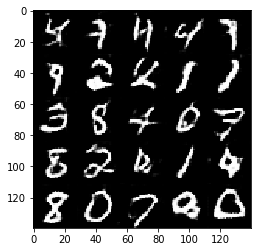

Epoch 1/2... Discriminator Loss: 0.7083... Generator Loss: 1.0971
Epoch 1/2... Discriminator Loss: 0.7920... Generator Loss: 1.0176
Epoch 1/2... Discriminator Loss: 0.8343... Generator Loss: 1.0757
Epoch 1/2... Discriminator Loss: 1.6973... Generator Loss: 0.3978
Epoch 1/2... Discriminator Loss: 1.4289... Generator Loss: 1.4767
Epoch 1/2... Discriminator Loss: 0.9640... Generator Loss: 1.0792
Epoch 1/2... Discriminator Loss: 0.9089... Generator Loss: 0.8424
Epoch 1/2... Discriminator Loss: 1.1051... Generator Loss: 1.1660
Epoch 1/2... Discriminator Loss: 1.5222... Generator Loss: 2.4845
Epoch 1/2... Discriminator Loss: 0.8114... Generator Loss: 1.3289


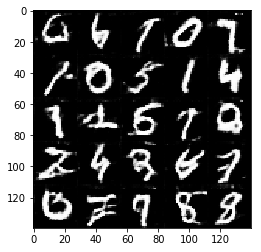

Epoch 1/2... Discriminator Loss: 1.0632... Generator Loss: 0.7093
Epoch 1/2... Discriminator Loss: 0.8282... Generator Loss: 1.0318
Epoch 1/2... Discriminator Loss: 1.0242... Generator Loss: 0.9547
Epoch 1/2... Discriminator Loss: 1.4266... Generator Loss: 0.6339
Epoch 1/2... Discriminator Loss: 1.6326... Generator Loss: 0.3376
Epoch 1/2... Discriminator Loss: 1.1982... Generator Loss: 0.6939
Epoch 1/2... Discriminator Loss: 0.8088... Generator Loss: 1.0876
Epoch 2/2... Discriminator Loss: 0.7526... Generator Loss: 1.2851
Epoch 2/2... Discriminator Loss: 0.9949... Generator Loss: 0.8536
Epoch 2/2... Discriminator Loss: 1.2182... Generator Loss: 2.2296


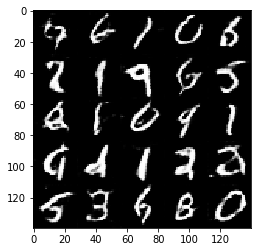

Epoch 2/2... Discriminator Loss: 0.6680... Generator Loss: 1.1150
Epoch 2/2... Discriminator Loss: 0.8267... Generator Loss: 1.1513
Epoch 2/2... Discriminator Loss: 1.2209... Generator Loss: 0.7881
Epoch 2/2... Discriminator Loss: 0.7552... Generator Loss: 1.7383
Epoch 2/2... Discriminator Loss: 0.7343... Generator Loss: 1.6639
Epoch 2/2... Discriminator Loss: 1.8417... Generator Loss: 0.3058
Epoch 2/2... Discriminator Loss: 1.0130... Generator Loss: 0.8682
Epoch 2/2... Discriminator Loss: 0.8255... Generator Loss: 1.7739
Epoch 2/2... Discriminator Loss: 0.8419... Generator Loss: 1.1578
Epoch 2/2... Discriminator Loss: 0.7512... Generator Loss: 0.9757


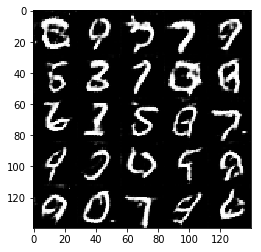

Epoch 2/2... Discriminator Loss: 0.6607... Generator Loss: 1.0096
Epoch 2/2... Discriminator Loss: 0.6427... Generator Loss: 1.6105
Epoch 2/2... Discriminator Loss: 1.0975... Generator Loss: 0.6851
Epoch 2/2... Discriminator Loss: 1.0831... Generator Loss: 0.6549
Epoch 2/2... Discriminator Loss: 0.7392... Generator Loss: 1.4438
Epoch 2/2... Discriminator Loss: 1.2134... Generator Loss: 0.6337
Epoch 2/2... Discriminator Loss: 1.7172... Generator Loss: 0.3629
Epoch 2/2... Discriminator Loss: 0.9297... Generator Loss: 0.9664
Epoch 2/2... Discriminator Loss: 1.1851... Generator Loss: 0.6613
Epoch 2/2... Discriminator Loss: 1.8456... Generator Loss: 0.3287


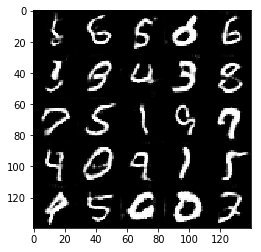

Epoch 2/2... Discriminator Loss: 1.4219... Generator Loss: 0.4319
Epoch 2/2... Discriminator Loss: 0.7995... Generator Loss: 1.0110
Epoch 2/2... Discriminator Loss: 0.7545... Generator Loss: 1.1720
Epoch 2/2... Discriminator Loss: 0.8622... Generator Loss: 0.9209
Epoch 2/2... Discriminator Loss: 0.9200... Generator Loss: 1.0777
Epoch 2/2... Discriminator Loss: 0.6291... Generator Loss: 1.7986
Epoch 2/2... Discriminator Loss: 1.0298... Generator Loss: 0.6355
Epoch 2/2... Discriminator Loss: 0.6042... Generator Loss: 1.5868
Epoch 2/2... Discriminator Loss: 0.7809... Generator Loss: 1.6096
Epoch 2/2... Discriminator Loss: 0.6998... Generator Loss: 1.5018


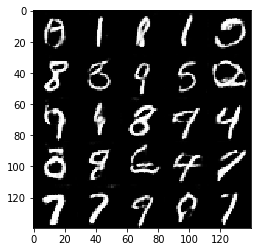

Epoch 2/2... Discriminator Loss: 1.1034... Generator Loss: 0.6661
Epoch 2/2... Discriminator Loss: 1.1304... Generator Loss: 0.6708
Epoch 2/2... Discriminator Loss: 0.7901... Generator Loss: 1.1346
Epoch 2/2... Discriminator Loss: 0.5818... Generator Loss: 1.4248
Epoch 2/2... Discriminator Loss: 0.6758... Generator Loss: 1.5046
Epoch 2/2... Discriminator Loss: 0.5604... Generator Loss: 2.0218
Epoch 2/2... Discriminator Loss: 0.7527... Generator Loss: 1.7853
Epoch 2/2... Discriminator Loss: 1.6328... Generator Loss: 0.3608
Epoch 2/2... Discriminator Loss: 1.5885... Generator Loss: 0.4052
Epoch 2/2... Discriminator Loss: 1.0083... Generator Loss: 0.8097


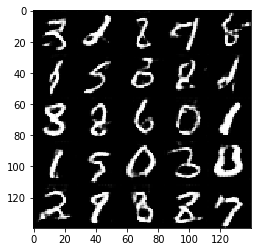

Epoch 2/2... Discriminator Loss: 1.5268... Generator Loss: 0.5226
Epoch 2/2... Discriminator Loss: 0.9367... Generator Loss: 0.7238
Epoch 2/2... Discriminator Loss: 0.5562... Generator Loss: 1.6343
Epoch 2/2... Discriminator Loss: 2.2291... Generator Loss: 0.2184
Epoch 2/2... Discriminator Loss: 0.6371... Generator Loss: 1.2468
Epoch 2/2... Discriminator Loss: 0.9224... Generator Loss: 1.0014
Epoch 2/2... Discriminator Loss: 1.0475... Generator Loss: 0.7363
Epoch 2/2... Discriminator Loss: 1.5719... Generator Loss: 0.3240
Epoch 2/2... Discriminator Loss: 0.7128... Generator Loss: 1.0410
Epoch 2/2... Discriminator Loss: 0.9581... Generator Loss: 1.2808


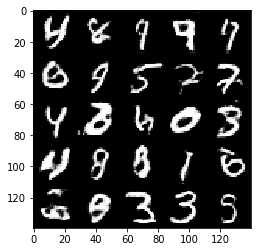

Epoch 2/2... Discriminator Loss: 1.0356... Generator Loss: 1.7051
Epoch 2/2... Discriminator Loss: 0.7883... Generator Loss: 1.0805
Epoch 2/2... Discriminator Loss: 0.7120... Generator Loss: 1.1091
Epoch 2/2... Discriminator Loss: 1.3385... Generator Loss: 0.5310
Epoch 2/2... Discriminator Loss: 0.6678... Generator Loss: 1.0525
Epoch 2/2... Discriminator Loss: 0.7475... Generator Loss: 1.6839
Epoch 2/2... Discriminator Loss: 0.6074... Generator Loss: 1.2470
Epoch 2/2... Discriminator Loss: 0.3677... Generator Loss: 2.2768
Epoch 2/2... Discriminator Loss: 0.5524... Generator Loss: 1.3430
Epoch 2/2... Discriminator Loss: 0.8054... Generator Loss: 3.2886


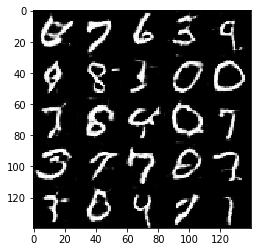

Epoch 2/2... Discriminator Loss: 1.2469... Generator Loss: 0.5811
Epoch 2/2... Discriminator Loss: 0.3997... Generator Loss: 2.1375
Epoch 2/2... Discriminator Loss: 0.7138... Generator Loss: 3.2054
Epoch 2/2... Discriminator Loss: 1.3392... Generator Loss: 0.5040
Epoch 2/2... Discriminator Loss: 0.8135... Generator Loss: 1.3311
Epoch 2/2... Discriminator Loss: 1.9868... Generator Loss: 0.3494
Epoch 2/2... Discriminator Loss: 0.5550... Generator Loss: 3.6604
Epoch 2/2... Discriminator Loss: 0.6316... Generator Loss: 1.2945
Epoch 2/2... Discriminator Loss: 0.5922... Generator Loss: 1.6633
Epoch 2/2... Discriminator Loss: 2.1921... Generator Loss: 0.2956


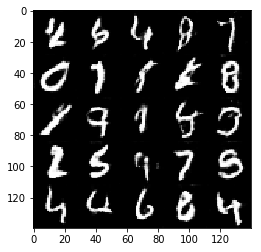

Epoch 2/2... Discriminator Loss: 0.6772... Generator Loss: 1.2872
Epoch 2/2... Discriminator Loss: 0.3150... Generator Loss: 1.8752
Epoch 2/2... Discriminator Loss: 0.7022... Generator Loss: 1.3168
Epoch 2/2... Discriminator Loss: 0.9651... Generator Loss: 0.8144
Epoch 2/2... Discriminator Loss: 0.6858... Generator Loss: 1.2404
Epoch 2/2... Discriminator Loss: 2.1438... Generator Loss: 0.2023
Epoch 2/2... Discriminator Loss: 0.7189... Generator Loss: 1.1138
Epoch 2/2... Discriminator Loss: 0.8377... Generator Loss: 1.0342
Epoch 2/2... Discriminator Loss: 1.1693... Generator Loss: 0.6995
Epoch 2/2... Discriminator Loss: 1.1343... Generator Loss: 0.8732


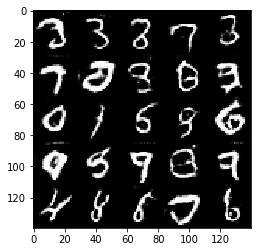

Epoch 2/2... Discriminator Loss: 0.3523... Generator Loss: 1.9428
Epoch 2/2... Discriminator Loss: 0.6846... Generator Loss: 3.0767
Epoch 2/2... Discriminator Loss: 0.9297... Generator Loss: 4.0740
Epoch 2/2... Discriminator Loss: 0.8995... Generator Loss: 2.0280
Epoch 2/2... Discriminator Loss: 0.6551... Generator Loss: 1.3103
Epoch 2/2... Discriminator Loss: 0.8506... Generator Loss: 1.0790
Epoch 2/2... Discriminator Loss: 0.9460... Generator Loss: 1.0416
Epoch 2/2... Discriminator Loss: 1.1916... Generator Loss: 0.7202
Epoch 2/2... Discriminator Loss: 0.5349... Generator Loss: 1.8303
Epoch 2/2... Discriminator Loss: 0.8342... Generator Loss: 1.2946


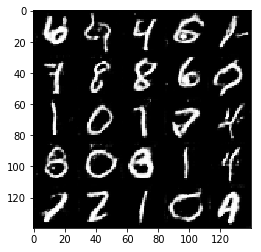

Epoch 2/2... Discriminator Loss: 0.6092... Generator Loss: 1.5593
Epoch 2/2... Discriminator Loss: 0.8240... Generator Loss: 1.8289
Epoch 2/2... Discriminator Loss: 2.4426... Generator Loss: 0.1392
Epoch 2/2... Discriminator Loss: 0.9437... Generator Loss: 0.7804
Epoch 2/2... Discriminator Loss: 1.3167... Generator Loss: 0.5067
Epoch 2/2... Discriminator Loss: 1.3279... Generator Loss: 0.4609
Epoch 2/2... Discriminator Loss: 0.7067... Generator Loss: 1.0605
Epoch 2/2... Discriminator Loss: 0.3828... Generator Loss: 1.8011
Epoch 2/2... Discriminator Loss: 1.0240... Generator Loss: 2.5812
Epoch 2/2... Discriminator Loss: 0.8830... Generator Loss: 1.1775


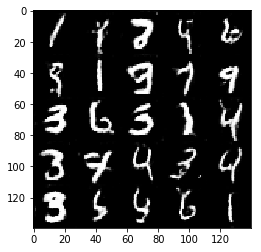

Epoch 2/2... Discriminator Loss: 0.5308... Generator Loss: 1.8322
Epoch 2/2... Discriminator Loss: 0.5311... Generator Loss: 1.9043
Epoch 2/2... Discriminator Loss: 0.6880... Generator Loss: 1.1255
Epoch 2/2... Discriminator Loss: 0.4062... Generator Loss: 1.6872
Epoch 2/2... Discriminator Loss: 0.7044... Generator Loss: 1.0065
Epoch 2/2... Discriminator Loss: 2.3806... Generator Loss: 0.1502
Epoch 2/2... Discriminator Loss: 0.6373... Generator Loss: 1.8961
Epoch 2/2... Discriminator Loss: 1.1504... Generator Loss: 0.7127
Epoch 2/2... Discriminator Loss: 0.7057... Generator Loss: 1.3409
Epoch 2/2... Discriminator Loss: 1.3204... Generator Loss: 0.6835


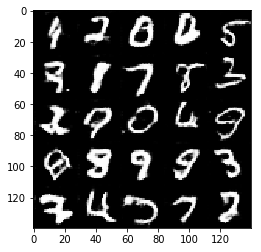

Epoch 2/2... Discriminator Loss: 0.6901... Generator Loss: 1.1116
Epoch 2/2... Discriminator Loss: 0.7182... Generator Loss: 2.6481
Epoch 2/2... Discriminator Loss: 0.6346... Generator Loss: 1.1594
Epoch 2/2... Discriminator Loss: 0.6906... Generator Loss: 1.0996
Epoch 2/2... Discriminator Loss: 2.1136... Generator Loss: 0.4607
Epoch 2/2... Discriminator Loss: 0.7654... Generator Loss: 1.4198
Epoch 2/2... Discriminator Loss: 0.2147... Generator Loss: 3.0199
Epoch 2/2... Discriminator Loss: 0.4051... Generator Loss: 2.0685
Epoch 2/2... Discriminator Loss: 0.4535... Generator Loss: 2.1234
Epoch 2/2... Discriminator Loss: 1.2431... Generator Loss: 0.6680


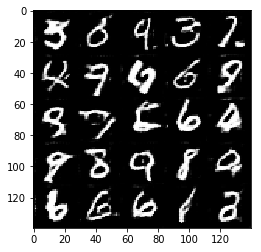

Epoch 2/2... Discriminator Loss: 1.5885... Generator Loss: 0.4383
Epoch 2/2... Discriminator Loss: 1.1129... Generator Loss: 0.7591
Epoch 2/2... Discriminator Loss: 1.8168... Generator Loss: 0.3537
Epoch 2/2... Discriminator Loss: 0.7069... Generator Loss: 1.1191
Epoch 2/2... Discriminator Loss: 0.6446... Generator Loss: 1.8166
Epoch 2/2... Discriminator Loss: 0.9536... Generator Loss: 1.3749
Epoch 2/2... Discriminator Loss: 1.2852... Generator Loss: 1.8997
Epoch 2/2... Discriminator Loss: 0.7959... Generator Loss: 0.9879
Epoch 2/2... Discriminator Loss: 1.8065... Generator Loss: 0.3881
Epoch 2/2... Discriminator Loss: 0.5977... Generator Loss: 2.2540


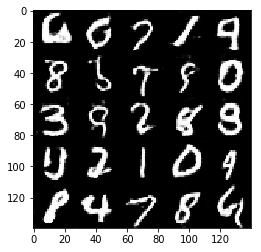

Epoch 2/2... Discriminator Loss: 1.3879... Generator Loss: 0.5131
Epoch 2/2... Discriminator Loss: 1.0695... Generator Loss: 0.7661
Epoch 2/2... Discriminator Loss: 1.8533... Generator Loss: 0.3368
Epoch 2/2... Discriminator Loss: 1.8174... Generator Loss: 0.2553
Epoch 2/2... Discriminator Loss: 1.0046... Generator Loss: 0.7154
Epoch 2/2... Discriminator Loss: 1.8013... Generator Loss: 0.3390
Epoch 2/2... Discriminator Loss: 1.0578... Generator Loss: 0.8700
Epoch 2/2... Discriminator Loss: 1.0481... Generator Loss: 0.7092
Epoch 2/2... Discriminator Loss: 0.7341... Generator Loss: 1.1642
Epoch 2/2... Discriminator Loss: 1.0190... Generator Loss: 0.8108


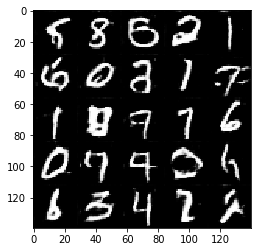

Epoch 2/2... Discriminator Loss: 0.6036... Generator Loss: 1.3827
Epoch 2/2... Discriminator Loss: 0.3771... Generator Loss: 1.7802
Epoch 2/2... Discriminator Loss: 1.1792... Generator Loss: 0.5972
Epoch 2/2... Discriminator Loss: 1.3586... Generator Loss: 0.4608
Epoch 2/2... Discriminator Loss: 0.7104... Generator Loss: 1.1908
Epoch 2/2... Discriminator Loss: 0.1456... Generator Loss: 2.7607
Epoch 2/2... Discriminator Loss: 0.6305... Generator Loss: 2.3373
Epoch 2/2... Discriminator Loss: 1.3268... Generator Loss: 0.6244
Epoch 2/2... Discriminator Loss: 0.5708... Generator Loss: 1.4478
Epoch 2/2... Discriminator Loss: 0.3069... Generator Loss: 2.0672


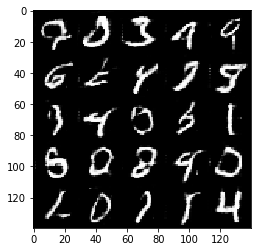

Epoch 2/2... Discriminator Loss: 1.2814... Generator Loss: 0.5893
Epoch 2/2... Discriminator Loss: 1.0376... Generator Loss: 0.8873
Epoch 2/2... Discriminator Loss: 0.5804... Generator Loss: 1.3267
Epoch 2/2... Discriminator Loss: 1.2806... Generator Loss: 0.7327
Epoch 2/2... Discriminator Loss: 0.3825... Generator Loss: 2.0232
Epoch 2/2... Discriminator Loss: 3.2088... Generator Loss: 0.1145
Epoch 2/2... Discriminator Loss: 1.3870... Generator Loss: 0.5066
Epoch 2/2... Discriminator Loss: 1.3676... Generator Loss: 0.7743
Epoch 2/2... Discriminator Loss: 2.3895... Generator Loss: 0.1664
Epoch 2/2... Discriminator Loss: 1.3033... Generator Loss: 0.5164


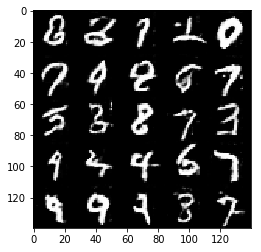

Epoch 2/2... Discriminator Loss: 0.3361... Generator Loss: 1.9618
Epoch 2/2... Discriminator Loss: 1.4902... Generator Loss: 0.4088
Epoch 2/2... Discriminator Loss: 0.3916... Generator Loss: 1.6984
Epoch 2/2... Discriminator Loss: 0.5636... Generator Loss: 1.9426
Epoch 2/2... Discriminator Loss: 0.9291... Generator Loss: 0.7278
Epoch 2/2... Discriminator Loss: 0.3947... Generator Loss: 1.4836
Epoch 2/2... Discriminator Loss: 0.6651... Generator Loss: 1.3009
Epoch 2/2... Discriminator Loss: 0.5903... Generator Loss: 1.2882
Epoch 2/2... Discriminator Loss: 2.8511... Generator Loss: 0.1696
Epoch 2/2... Discriminator Loss: 1.7064... Generator Loss: 0.3836


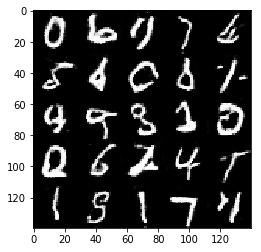

Epoch 2/2... Discriminator Loss: 1.0627... Generator Loss: 0.7656
Epoch 2/2... Discriminator Loss: 0.5011... Generator Loss: 1.4785
Epoch 2/2... Discriminator Loss: 0.3740... Generator Loss: 2.1709
Epoch 2/2... Discriminator Loss: 1.2021... Generator Loss: 0.7903
Epoch 2/2... Discriminator Loss: 0.7993... Generator Loss: 1.2056
Epoch 2/2... Discriminator Loss: 0.9541... Generator Loss: 0.8972
Epoch 2/2... Discriminator Loss: 1.2012... Generator Loss: 0.5852
Epoch 2/2... Discriminator Loss: 0.5068... Generator Loss: 1.7657
Epoch 2/2... Discriminator Loss: 0.5394... Generator Loss: 1.4912
Epoch 2/2... Discriminator Loss: 0.8731... Generator Loss: 0.7812


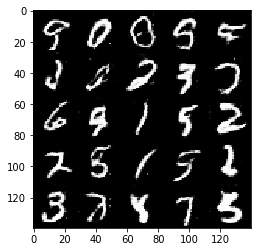

Epoch 2/2... Discriminator Loss: 0.5787... Generator Loss: 1.4197
Epoch 2/2... Discriminator Loss: 0.9573... Generator Loss: 0.9673
Epoch 2/2... Discriminator Loss: 1.1919... Generator Loss: 0.7381
Epoch 2/2... Discriminator Loss: 1.0185... Generator Loss: 0.9191
Epoch 2/2... Discriminator Loss: 0.6201... Generator Loss: 1.3112


In [13]:
batch_size = 32
z_dim = 100
learning_rate = 0.005
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.3100... Generator Loss: 2.6864
Epoch 1/1... Discriminator Loss: 0.0100... Generator Loss: 5.5229
Epoch 1/1... Discriminator Loss: 4.4624... Generator Loss: 0.8240
Epoch 1/1... Discriminator Loss: 1.8998... Generator Loss: 0.5725
Epoch 1/1... Discriminator Loss: 0.5026... Generator Loss: 1.9035
Epoch 1/1... Discriminator Loss: 0.5163... Generator Loss: 1.7498
Epoch 1/1... Discriminator Loss: 0.1534... Generator Loss: 3.4426
Epoch 1/1... Discriminator Loss: 0.9705... Generator Loss: 1.5819
Epoch 1/1... Discriminator Loss: 1.3008... Generator Loss: 6.2529
Epoch 1/1... Discriminator Loss: 0.1052... Generator Loss: 3.2529


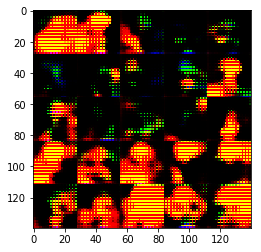

Epoch 1/1... Discriminator Loss: 0.1503... Generator Loss: 3.8888
Epoch 1/1... Discriminator Loss: 0.6456... Generator Loss: 4.6227
Epoch 1/1... Discriminator Loss: 0.4750... Generator Loss: 3.3424
Epoch 1/1... Discriminator Loss: 0.3749... Generator Loss: 1.6972
Epoch 1/1... Discriminator Loss: 1.0452... Generator Loss: 0.9040
Epoch 1/1... Discriminator Loss: 2.1469... Generator Loss: 2.9952
Epoch 1/1... Discriminator Loss: 0.0319... Generator Loss: 3.9199
Epoch 1/1... Discriminator Loss: 1.5811... Generator Loss: 0.4206
Epoch 1/1... Discriminator Loss: 0.3261... Generator Loss: 2.4737
Epoch 1/1... Discriminator Loss: 1.2386... Generator Loss: 12.0811


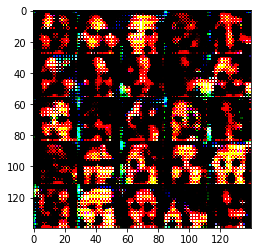

Epoch 1/1... Discriminator Loss: 0.1082... Generator Loss: 3.6596
Epoch 1/1... Discriminator Loss: 0.3118... Generator Loss: 2.2033
Epoch 1/1... Discriminator Loss: 0.3854... Generator Loss: 1.7644
Epoch 1/1... Discriminator Loss: 0.0425... Generator Loss: 4.0139
Epoch 1/1... Discriminator Loss: 0.0584... Generator Loss: 3.4211
Epoch 1/1... Discriminator Loss: 0.0083... Generator Loss: 5.7150
Epoch 1/1... Discriminator Loss: 0.0125... Generator Loss: 4.9625
Epoch 1/1... Discriminator Loss: 0.0215... Generator Loss: 4.7319
Epoch 1/1... Discriminator Loss: 0.0151... Generator Loss: 4.4126
Epoch 1/1... Discriminator Loss: 0.0026... Generator Loss: 7.0998


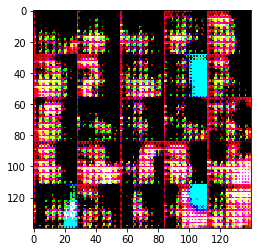

Epoch 1/1... Discriminator Loss: 0.0050... Generator Loss: 6.4386
Epoch 1/1... Discriminator Loss: 0.0162... Generator Loss: 4.6589
Epoch 1/1... Discriminator Loss: 0.0033... Generator Loss: 6.1267
Epoch 1/1... Discriminator Loss: 0.0034... Generator Loss: 7.4588
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 12.1535
Epoch 1/1... Discriminator Loss: 0.0247... Generator Loss: 4.1584
Epoch 1/1... Discriminator Loss: 0.0010... Generator Loss: 7.5388
Epoch 1/1... Discriminator Loss: 0.0074... Generator Loss: 5.3642
Epoch 1/1... Discriminator Loss: 3.0713... Generator Loss: 5.2126
Epoch 1/1... Discriminator Loss: 5.1038... Generator Loss: 8.1634


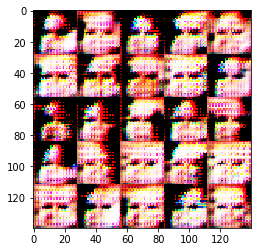

Epoch 1/1... Discriminator Loss: 0.8795... Generator Loss: 1.1930
Epoch 1/1... Discriminator Loss: 3.7929... Generator Loss: 0.0517
Epoch 1/1... Discriminator Loss: 1.3548... Generator Loss: 1.5604
Epoch 1/1... Discriminator Loss: 0.7357... Generator Loss: 1.3879
Epoch 1/1... Discriminator Loss: 0.6999... Generator Loss: 1.3610
Epoch 1/1... Discriminator Loss: 0.3601... Generator Loss: 2.7641
Epoch 1/1... Discriminator Loss: 0.7008... Generator Loss: 2.1629
Epoch 1/1... Discriminator Loss: 0.2198... Generator Loss: 2.7286
Epoch 1/1... Discriminator Loss: 0.4876... Generator Loss: 2.2564
Epoch 1/1... Discriminator Loss: 0.1299... Generator Loss: 3.9296


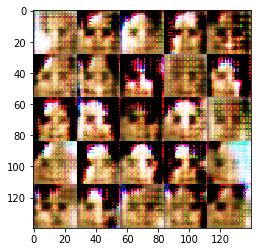

Epoch 1/1... Discriminator Loss: 1.6674... Generator Loss: 0.7161
Epoch 1/1... Discriminator Loss: 1.3273... Generator Loss: 0.7873
Epoch 1/1... Discriminator Loss: 1.2375... Generator Loss: 0.7843
Epoch 1/1... Discriminator Loss: 0.8088... Generator Loss: 2.0770
Epoch 1/1... Discriminator Loss: 0.2687... Generator Loss: 2.7746
Epoch 1/1... Discriminator Loss: 0.8945... Generator Loss: 1.2783
Epoch 1/1... Discriminator Loss: 3.9165... Generator Loss: 3.8195
Epoch 1/1... Discriminator Loss: 1.2794... Generator Loss: 0.7340
Epoch 1/1... Discriminator Loss: 1.3564... Generator Loss: 0.4796
Epoch 1/1... Discriminator Loss: 1.3372... Generator Loss: 0.4464


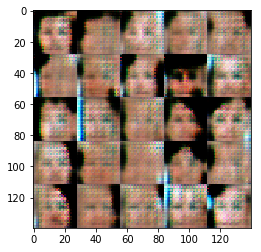

Epoch 1/1... Discriminator Loss: 0.8073... Generator Loss: 0.9466
Epoch 1/1... Discriminator Loss: 0.8201... Generator Loss: 1.3247
Epoch 1/1... Discriminator Loss: 0.7475... Generator Loss: 1.5658
Epoch 1/1... Discriminator Loss: 0.9829... Generator Loss: 1.0984
Epoch 1/1... Discriminator Loss: 2.1003... Generator Loss: 3.3720
Epoch 1/1... Discriminator Loss: 1.2821... Generator Loss: 0.7999
Epoch 1/1... Discriminator Loss: 1.2454... Generator Loss: 0.9261
Epoch 1/1... Discriminator Loss: 1.1151... Generator Loss: 0.6306
Epoch 1/1... Discriminator Loss: 1.1001... Generator Loss: 1.4187
Epoch 1/1... Discriminator Loss: 1.2369... Generator Loss: 1.2718


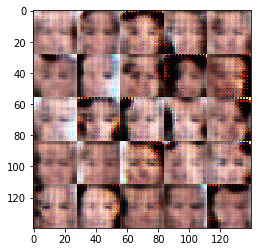

Epoch 1/1... Discriminator Loss: 1.0594... Generator Loss: 0.8872
Epoch 1/1... Discriminator Loss: 1.1680... Generator Loss: 1.4317
Epoch 1/1... Discriminator Loss: 1.9043... Generator Loss: 0.2418
Epoch 1/1... Discriminator Loss: 0.8179... Generator Loss: 1.0024
Epoch 1/1... Discriminator Loss: 1.1670... Generator Loss: 0.7844
Epoch 1/1... Discriminator Loss: 1.4938... Generator Loss: 1.2003
Epoch 1/1... Discriminator Loss: 0.7671... Generator Loss: 1.0124
Epoch 1/1... Discriminator Loss: 0.7440... Generator Loss: 1.7022
Epoch 1/1... Discriminator Loss: 1.7468... Generator Loss: 0.6651
Epoch 1/1... Discriminator Loss: 1.3615... Generator Loss: 0.9144


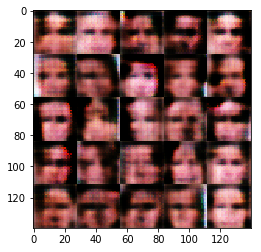

Epoch 1/1... Discriminator Loss: 1.4959... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.3410... Generator Loss: 0.8636
Epoch 1/1... Discriminator Loss: 1.2869... Generator Loss: 0.8392
Epoch 1/1... Discriminator Loss: 1.3771... Generator Loss: 1.1523
Epoch 1/1... Discriminator Loss: 1.2676... Generator Loss: 0.8521
Epoch 1/1... Discriminator Loss: 1.2305... Generator Loss: 0.9001
Epoch 1/1... Discriminator Loss: 1.1600... Generator Loss: 0.8326
Epoch 1/1... Discriminator Loss: 1.1376... Generator Loss: 0.7978
Epoch 1/1... Discriminator Loss: 1.2594... Generator Loss: 0.6274
Epoch 1/1... Discriminator Loss: 1.2898... Generator Loss: 1.0377


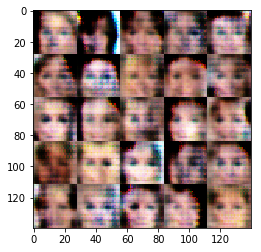

Epoch 1/1... Discriminator Loss: 1.3471... Generator Loss: 0.7999
Epoch 1/1... Discriminator Loss: 1.1481... Generator Loss: 1.0824
Epoch 1/1... Discriminator Loss: 1.2292... Generator Loss: 0.8169
Epoch 1/1... Discriminator Loss: 1.2234... Generator Loss: 0.6394
Epoch 1/1... Discriminator Loss: 1.4403... Generator Loss: 0.8091
Epoch 1/1... Discriminator Loss: 1.5277... Generator Loss: 1.4419
Epoch 1/1... Discriminator Loss: 1.2764... Generator Loss: 0.7017
Epoch 1/1... Discriminator Loss: 1.2431... Generator Loss: 0.7556
Epoch 1/1... Discriminator Loss: 1.0252... Generator Loss: 0.9200
Epoch 1/1... Discriminator Loss: 1.1312... Generator Loss: 0.7277


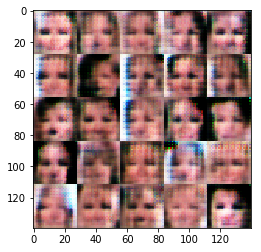

Epoch 1/1... Discriminator Loss: 1.0448... Generator Loss: 1.0028
Epoch 1/1... Discriminator Loss: 1.3491... Generator Loss: 0.8330
Epoch 1/1... Discriminator Loss: 1.1215... Generator Loss: 1.1271
Epoch 1/1... Discriminator Loss: 1.1870... Generator Loss: 0.8976
Epoch 1/1... Discriminator Loss: 1.2723... Generator Loss: 0.5794
Epoch 1/1... Discriminator Loss: 1.0308... Generator Loss: 0.7242
Epoch 1/1... Discriminator Loss: 1.2968... Generator Loss: 1.0683
Epoch 1/1... Discriminator Loss: 1.4670... Generator Loss: 0.4584
Epoch 1/1... Discriminator Loss: 1.1150... Generator Loss: 0.8583
Epoch 1/1... Discriminator Loss: 1.3783... Generator Loss: 0.4277


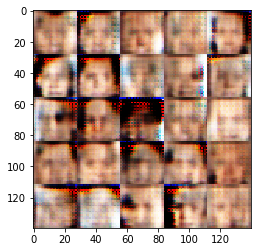

Epoch 1/1... Discriminator Loss: 1.4920... Generator Loss: 1.5927
Epoch 1/1... Discriminator Loss: 0.9660... Generator Loss: 0.8021
Epoch 1/1... Discriminator Loss: 1.4855... Generator Loss: 1.8321
Epoch 1/1... Discriminator Loss: 1.1384... Generator Loss: 0.9229
Epoch 1/1... Discriminator Loss: 1.4014... Generator Loss: 0.7269
Epoch 1/1... Discriminator Loss: 1.0637... Generator Loss: 1.1229
Epoch 1/1... Discriminator Loss: 1.1335... Generator Loss: 0.6475
Epoch 1/1... Discriminator Loss: 1.1685... Generator Loss: 0.6125
Epoch 1/1... Discriminator Loss: 1.5311... Generator Loss: 1.3396
Epoch 1/1... Discriminator Loss: 1.3501... Generator Loss: 1.0052


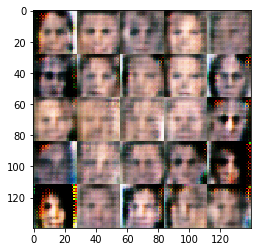

Epoch 1/1... Discriminator Loss: 1.1741... Generator Loss: 0.6059
Epoch 1/1... Discriminator Loss: 1.3008... Generator Loss: 0.5994
Epoch 1/1... Discriminator Loss: 1.0387... Generator Loss: 0.8107
Epoch 1/1... Discriminator Loss: 1.0096... Generator Loss: 1.0571
Epoch 1/1... Discriminator Loss: 1.2862... Generator Loss: 0.7381
Epoch 1/1... Discriminator Loss: 0.9203... Generator Loss: 0.8834
Epoch 1/1... Discriminator Loss: 1.6728... Generator Loss: 0.4148
Epoch 1/1... Discriminator Loss: 1.2468... Generator Loss: 0.5112
Epoch 1/1... Discriminator Loss: 1.4776... Generator Loss: 0.5151
Epoch 1/1... Discriminator Loss: 1.1712... Generator Loss: 1.0254


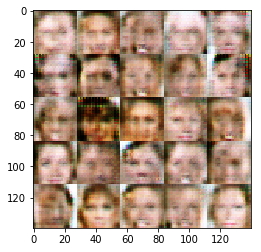

Epoch 1/1... Discriminator Loss: 1.2757... Generator Loss: 0.6357
Epoch 1/1... Discriminator Loss: 1.1899... Generator Loss: 1.1687
Epoch 1/1... Discriminator Loss: 1.0692... Generator Loss: 0.7340
Epoch 1/1... Discriminator Loss: 1.7398... Generator Loss: 0.5650
Epoch 1/1... Discriminator Loss: 0.8278... Generator Loss: 0.9444
Epoch 1/1... Discriminator Loss: 1.2101... Generator Loss: 0.8495
Epoch 1/1... Discriminator Loss: 0.9742... Generator Loss: 0.8681
Epoch 1/1... Discriminator Loss: 1.4043... Generator Loss: 0.8206
Epoch 1/1... Discriminator Loss: 1.2667... Generator Loss: 0.5478
Epoch 1/1... Discriminator Loss: 1.1632... Generator Loss: 0.7335


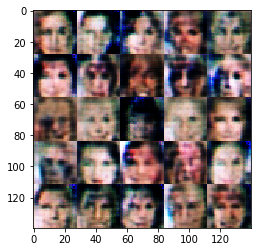

Epoch 1/1... Discriminator Loss: 1.5433... Generator Loss: 0.8899
Epoch 1/1... Discriminator Loss: 1.1200... Generator Loss: 0.7478
Epoch 1/1... Discriminator Loss: 1.3410... Generator Loss: 0.6062
Epoch 1/1... Discriminator Loss: 1.4887... Generator Loss: 0.4763
Epoch 1/1... Discriminator Loss: 1.0814... Generator Loss: 1.0236
Epoch 1/1... Discriminator Loss: 1.3651... Generator Loss: 0.5391
Epoch 1/1... Discriminator Loss: 1.6793... Generator Loss: 0.6330
Epoch 1/1... Discriminator Loss: 1.1526... Generator Loss: 0.6535
Epoch 1/1... Discriminator Loss: 1.1570... Generator Loss: 0.8636
Epoch 1/1... Discriminator Loss: 1.2296... Generator Loss: 0.6772


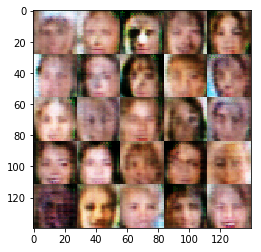

Epoch 1/1... Discriminator Loss: 1.1728... Generator Loss: 1.0258
Epoch 1/1... Discriminator Loss: 1.3833... Generator Loss: 0.7124
Epoch 1/1... Discriminator Loss: 1.1789... Generator Loss: 1.1899
Epoch 1/1... Discriminator Loss: 1.2130... Generator Loss: 0.8623
Epoch 1/1... Discriminator Loss: 1.1997... Generator Loss: 0.7195
Epoch 1/1... Discriminator Loss: 1.5040... Generator Loss: 0.4638
Epoch 1/1... Discriminator Loss: 1.4665... Generator Loss: 0.7273
Epoch 1/1... Discriminator Loss: 1.3656... Generator Loss: 0.5023
Epoch 1/1... Discriminator Loss: 1.3336... Generator Loss: 1.0535
Epoch 1/1... Discriminator Loss: 1.4274... Generator Loss: 0.4790


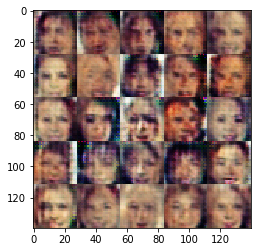

Epoch 1/1... Discriminator Loss: 1.4747... Generator Loss: 0.6032
Epoch 1/1... Discriminator Loss: 1.2167... Generator Loss: 0.7285
Epoch 1/1... Discriminator Loss: 1.2061... Generator Loss: 0.9413
Epoch 1/1... Discriminator Loss: 1.2538... Generator Loss: 0.9291
Epoch 1/1... Discriminator Loss: 1.1470... Generator Loss: 0.8841
Epoch 1/1... Discriminator Loss: 1.3744... Generator Loss: 0.5948
Epoch 1/1... Discriminator Loss: 1.3106... Generator Loss: 0.6360
Epoch 1/1... Discriminator Loss: 1.2353... Generator Loss: 0.5698
Epoch 1/1... Discriminator Loss: 1.1136... Generator Loss: 0.8704
Epoch 1/1... Discriminator Loss: 1.2911... Generator Loss: 0.5496


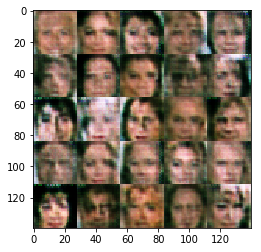

Epoch 1/1... Discriminator Loss: 1.3934... Generator Loss: 0.9343
Epoch 1/1... Discriminator Loss: 1.1278... Generator Loss: 0.8476
Epoch 1/1... Discriminator Loss: 1.4171... Generator Loss: 0.6551
Epoch 1/1... Discriminator Loss: 1.3558... Generator Loss: 0.8974
Epoch 1/1... Discriminator Loss: 1.4658... Generator Loss: 0.6535
Epoch 1/1... Discriminator Loss: 1.1816... Generator Loss: 1.0284
Epoch 1/1... Discriminator Loss: 1.5011... Generator Loss: 0.5115
Epoch 1/1... Discriminator Loss: 1.0750... Generator Loss: 0.8764
Epoch 1/1... Discriminator Loss: 0.9886... Generator Loss: 0.9202
Epoch 1/1... Discriminator Loss: 1.2468... Generator Loss: 0.6412


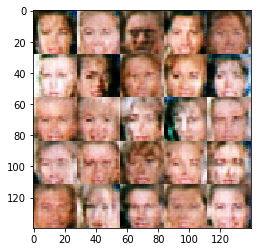

Epoch 1/1... Discriminator Loss: 1.6522... Generator Loss: 0.3880
Epoch 1/1... Discriminator Loss: 1.0822... Generator Loss: 0.7467
Epoch 1/1... Discriminator Loss: 1.4356... Generator Loss: 0.6260
Epoch 1/1... Discriminator Loss: 1.2857... Generator Loss: 0.5800
Epoch 1/1... Discriminator Loss: 1.2149... Generator Loss: 0.5468
Epoch 1/1... Discriminator Loss: 1.1664... Generator Loss: 1.1098
Epoch 1/1... Discriminator Loss: 0.9924... Generator Loss: 0.9077
Epoch 1/1... Discriminator Loss: 1.2945... Generator Loss: 0.8938
Epoch 1/1... Discriminator Loss: 0.8601... Generator Loss: 1.2766
Epoch 1/1... Discriminator Loss: 0.9646... Generator Loss: 0.7634


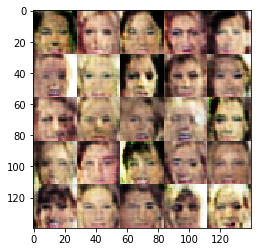

Epoch 1/1... Discriminator Loss: 1.1134... Generator Loss: 0.7462
Epoch 1/1... Discriminator Loss: 1.3593... Generator Loss: 1.1153
Epoch 1/1... Discriminator Loss: 1.3049... Generator Loss: 0.5311
Epoch 1/1... Discriminator Loss: 1.4540... Generator Loss: 0.6656
Epoch 1/1... Discriminator Loss: 1.3320... Generator Loss: 0.6745
Epoch 1/1... Discriminator Loss: 1.2886... Generator Loss: 0.6555
Epoch 1/1... Discriminator Loss: 1.4233... Generator Loss: 1.0083
Epoch 1/1... Discriminator Loss: 1.0992... Generator Loss: 0.9612
Epoch 1/1... Discriminator Loss: 1.2432... Generator Loss: 0.8589
Epoch 1/1... Discriminator Loss: 1.4475... Generator Loss: 0.4782


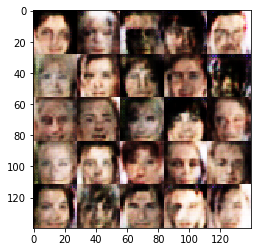

Epoch 1/1... Discriminator Loss: 1.1006... Generator Loss: 0.6890
Epoch 1/1... Discriminator Loss: 1.0822... Generator Loss: 0.9057
Epoch 1/1... Discriminator Loss: 1.2700... Generator Loss: 0.6467
Epoch 1/1... Discriminator Loss: 1.0654... Generator Loss: 0.9205
Epoch 1/1... Discriminator Loss: 1.3914... Generator Loss: 0.7195
Epoch 1/1... Discriminator Loss: 1.1060... Generator Loss: 0.8825
Epoch 1/1... Discriminator Loss: 1.3359... Generator Loss: 0.7014
Epoch 1/1... Discriminator Loss: 1.3990... Generator Loss: 0.4256
Epoch 1/1... Discriminator Loss: 0.9738... Generator Loss: 0.9137
Epoch 1/1... Discriminator Loss: 1.2659... Generator Loss: 0.6243


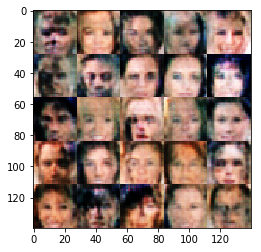

Epoch 1/1... Discriminator Loss: 1.0235... Generator Loss: 0.9263
Epoch 1/1... Discriminator Loss: 1.2447... Generator Loss: 1.1115
Epoch 1/1... Discriminator Loss: 1.6717... Generator Loss: 0.3390
Epoch 1/1... Discriminator Loss: 1.0683... Generator Loss: 0.9799
Epoch 1/1... Discriminator Loss: 1.0237... Generator Loss: 0.7415
Epoch 1/1... Discriminator Loss: 1.3007... Generator Loss: 0.6906
Epoch 1/1... Discriminator Loss: 1.0750... Generator Loss: 0.7364
Epoch 1/1... Discriminator Loss: 1.2877... Generator Loss: 0.7507
Epoch 1/1... Discriminator Loss: 1.3795... Generator Loss: 0.5758
Epoch 1/1... Discriminator Loss: 1.4270... Generator Loss: 0.4538


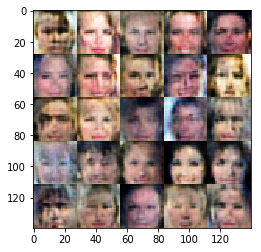

Epoch 1/1... Discriminator Loss: 1.2021... Generator Loss: 0.7435
Epoch 1/1... Discriminator Loss: 1.2471... Generator Loss: 0.6626
Epoch 1/1... Discriminator Loss: 1.1534... Generator Loss: 0.7599
Epoch 1/1... Discriminator Loss: 1.1616... Generator Loss: 0.7884
Epoch 1/1... Discriminator Loss: 0.9477... Generator Loss: 0.9086
Epoch 1/1... Discriminator Loss: 1.5331... Generator Loss: 0.3716
Epoch 1/1... Discriminator Loss: 1.3566... Generator Loss: 0.6376
Epoch 1/1... Discriminator Loss: 1.5043... Generator Loss: 0.4554
Epoch 1/1... Discriminator Loss: 1.3731... Generator Loss: 0.6319
Epoch 1/1... Discriminator Loss: 0.9798... Generator Loss: 1.1355


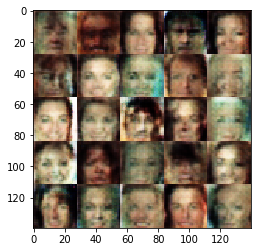

Epoch 1/1... Discriminator Loss: 1.0497... Generator Loss: 1.1457
Epoch 1/1... Discriminator Loss: 1.1410... Generator Loss: 0.9474
Epoch 1/1... Discriminator Loss: 1.3186... Generator Loss: 0.5781
Epoch 1/1... Discriminator Loss: 1.3365... Generator Loss: 0.7330
Epoch 1/1... Discriminator Loss: 1.2524... Generator Loss: 0.8050
Epoch 1/1... Discriminator Loss: 1.3348... Generator Loss: 0.4989
Epoch 1/1... Discriminator Loss: 1.2384... Generator Loss: 0.7857
Epoch 1/1... Discriminator Loss: 1.2538... Generator Loss: 0.6570
Epoch 1/1... Discriminator Loss: 0.9894... Generator Loss: 1.4234
Epoch 1/1... Discriminator Loss: 1.2080... Generator Loss: 0.8997


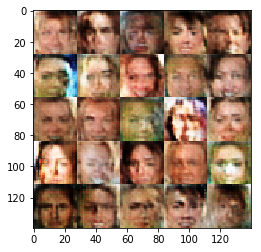

Epoch 1/1... Discriminator Loss: 1.2842... Generator Loss: 0.6393
Epoch 1/1... Discriminator Loss: 1.2306... Generator Loss: 0.7641
Epoch 1/1... Discriminator Loss: 1.3311... Generator Loss: 0.7893
Epoch 1/1... Discriminator Loss: 1.3380... Generator Loss: 0.6184
Epoch 1/1... Discriminator Loss: 1.3227... Generator Loss: 0.5470
Epoch 1/1... Discriminator Loss: 1.4104... Generator Loss: 0.6296
Epoch 1/1... Discriminator Loss: 1.2372... Generator Loss: 0.7195
Epoch 1/1... Discriminator Loss: 1.3467... Generator Loss: 0.6387
Epoch 1/1... Discriminator Loss: 1.2714... Generator Loss: 0.5763
Epoch 1/1... Discriminator Loss: 1.2846... Generator Loss: 0.6507


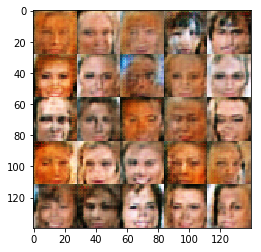

Epoch 1/1... Discriminator Loss: 1.3887... Generator Loss: 0.5192
Epoch 1/1... Discriminator Loss: 1.2234... Generator Loss: 0.6699
Epoch 1/1... Discriminator Loss: 1.4590... Generator Loss: 0.8138
Epoch 1/1... Discriminator Loss: 1.2270... Generator Loss: 0.7250
Epoch 1/1... Discriminator Loss: 1.1440... Generator Loss: 0.6698
Epoch 1/1... Discriminator Loss: 1.3578... Generator Loss: 0.5081
Epoch 1/1... Discriminator Loss: 1.3111... Generator Loss: 0.5584
Epoch 1/1... Discriminator Loss: 1.1007... Generator Loss: 0.7244
Epoch 1/1... Discriminator Loss: 1.1610... Generator Loss: 0.5778
Epoch 1/1... Discriminator Loss: 1.3905... Generator Loss: 0.7879


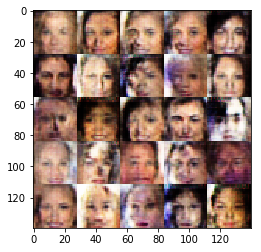

Epoch 1/1... Discriminator Loss: 1.1507... Generator Loss: 0.8661
Epoch 1/1... Discriminator Loss: 1.2640... Generator Loss: 0.5360
Epoch 1/1... Discriminator Loss: 1.5521... Generator Loss: 0.6203
Epoch 1/1... Discriminator Loss: 1.3710... Generator Loss: 0.5678
Epoch 1/1... Discriminator Loss: 1.1689... Generator Loss: 0.7086
Epoch 1/1... Discriminator Loss: 1.2129... Generator Loss: 0.7288
Epoch 1/1... Discriminator Loss: 1.3533... Generator Loss: 0.6191
Epoch 1/1... Discriminator Loss: 1.1696... Generator Loss: 0.8631
Epoch 1/1... Discriminator Loss: 1.1768... Generator Loss: 0.5742
Epoch 1/1... Discriminator Loss: 1.3402... Generator Loss: 0.7253


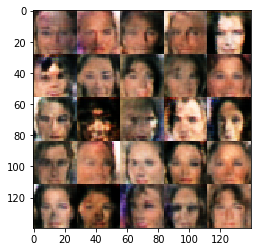

Epoch 1/1... Discriminator Loss: 1.3029... Generator Loss: 0.7042
Epoch 1/1... Discriminator Loss: 1.2922... Generator Loss: 0.5479
Epoch 1/1... Discriminator Loss: 1.1357... Generator Loss: 0.9232
Epoch 1/1... Discriminator Loss: 1.3048... Generator Loss: 0.6530
Epoch 1/1... Discriminator Loss: 1.2183... Generator Loss: 1.0166
Epoch 1/1... Discriminator Loss: 1.3474... Generator Loss: 0.7677
Epoch 1/1... Discriminator Loss: 1.1507... Generator Loss: 0.6990
Epoch 1/1... Discriminator Loss: 1.2616... Generator Loss: 0.6176
Epoch 1/1... Discriminator Loss: 1.3097... Generator Loss: 0.8052
Epoch 1/1... Discriminator Loss: 1.4385... Generator Loss: 0.5798


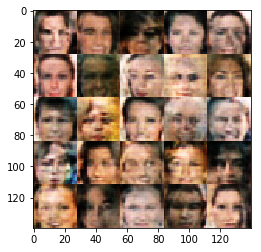

Epoch 1/1... Discriminator Loss: 1.2752... Generator Loss: 0.8301
Epoch 1/1... Discriminator Loss: 1.1861... Generator Loss: 0.8507
Epoch 1/1... Discriminator Loss: 1.3063... Generator Loss: 0.5862
Epoch 1/1... Discriminator Loss: 1.0339... Generator Loss: 0.7727
Epoch 1/1... Discriminator Loss: 1.2116... Generator Loss: 0.7857
Epoch 1/1... Discriminator Loss: 1.3235... Generator Loss: 0.5047
Epoch 1/1... Discriminator Loss: 1.4528... Generator Loss: 0.5845
Epoch 1/1... Discriminator Loss: 1.3205... Generator Loss: 0.7168
Epoch 1/1... Discriminator Loss: 1.3643... Generator Loss: 0.8453
Epoch 1/1... Discriminator Loss: 1.2526... Generator Loss: 0.7140


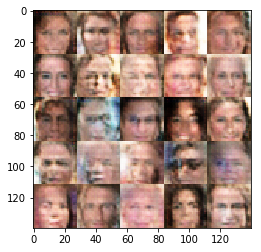

Epoch 1/1... Discriminator Loss: 1.2645... Generator Loss: 0.7610
Epoch 1/1... Discriminator Loss: 1.2322... Generator Loss: 0.7317
Epoch 1/1... Discriminator Loss: 1.4017... Generator Loss: 0.5910
Epoch 1/1... Discriminator Loss: 1.1905... Generator Loss: 0.6938
Epoch 1/1... Discriminator Loss: 1.2686... Generator Loss: 0.6662
Epoch 1/1... Discriminator Loss: 1.1224... Generator Loss: 0.7179
Epoch 1/1... Discriminator Loss: 1.2563... Generator Loss: 0.9017
Epoch 1/1... Discriminator Loss: 1.2436... Generator Loss: 0.7459
Epoch 1/1... Discriminator Loss: 1.1311... Generator Loss: 0.7860
Epoch 1/1... Discriminator Loss: 1.3099... Generator Loss: 0.8288


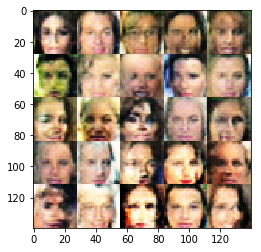

Epoch 1/1... Discriminator Loss: 1.2081... Generator Loss: 0.7365
Epoch 1/1... Discriminator Loss: 1.4609... Generator Loss: 0.4034
Epoch 1/1... Discriminator Loss: 1.3514... Generator Loss: 0.6821
Epoch 1/1... Discriminator Loss: 1.3193... Generator Loss: 0.6024
Epoch 1/1... Discriminator Loss: 1.3048... Generator Loss: 0.8154
Epoch 1/1... Discriminator Loss: 1.4502... Generator Loss: 0.5263
Epoch 1/1... Discriminator Loss: 1.2106... Generator Loss: 0.7560
Epoch 1/1... Discriminator Loss: 1.2841... Generator Loss: 0.6502
Epoch 1/1... Discriminator Loss: 1.2382... Generator Loss: 0.6568
Epoch 1/1... Discriminator Loss: 1.1261... Generator Loss: 0.7913


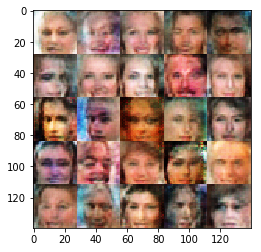

Epoch 1/1... Discriminator Loss: 1.4078... Generator Loss: 0.5585
Epoch 1/1... Discriminator Loss: 1.2977... Generator Loss: 0.7397
Epoch 1/1... Discriminator Loss: 1.2433... Generator Loss: 0.6592
Epoch 1/1... Discriminator Loss: 1.4353... Generator Loss: 0.5931
Epoch 1/1... Discriminator Loss: 1.3002... Generator Loss: 0.5557
Epoch 1/1... Discriminator Loss: 1.5750... Generator Loss: 1.0875
Epoch 1/1... Discriminator Loss: 1.3470... Generator Loss: 0.7715
Epoch 1/1... Discriminator Loss: 1.4160... Generator Loss: 0.6843
Epoch 1/1... Discriminator Loss: 1.1196... Generator Loss: 0.7656
Epoch 1/1... Discriminator Loss: 1.1954... Generator Loss: 0.9030


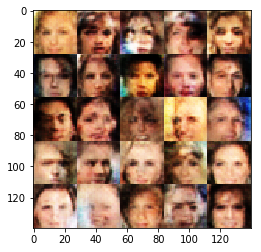

Epoch 1/1... Discriminator Loss: 1.3866... Generator Loss: 0.6407
Epoch 1/1... Discriminator Loss: 1.3142... Generator Loss: 0.5008
Epoch 1/1... Discriminator Loss: 1.3055... Generator Loss: 0.5767
Epoch 1/1... Discriminator Loss: 1.3944... Generator Loss: 0.5100
Epoch 1/1... Discriminator Loss: 1.0817... Generator Loss: 0.7985
Epoch 1/1... Discriminator Loss: 1.2203... Generator Loss: 0.7646
Epoch 1/1... Discriminator Loss: 1.5752... Generator Loss: 0.3810
Epoch 1/1... Discriminator Loss: 1.0739... Generator Loss: 0.8818
Epoch 1/1... Discriminator Loss: 1.1371... Generator Loss: 0.7839
Epoch 1/1... Discriminator Loss: 1.4018... Generator Loss: 0.6016


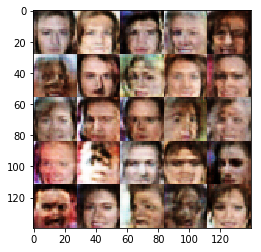

Epoch 1/1... Discriminator Loss: 1.3507... Generator Loss: 0.6413
Epoch 1/1... Discriminator Loss: 1.2459... Generator Loss: 0.5166
Epoch 1/1... Discriminator Loss: 1.4000... Generator Loss: 0.6949
Epoch 1/1... Discriminator Loss: 1.2996... Generator Loss: 0.5555
Epoch 1/1... Discriminator Loss: 1.1777... Generator Loss: 0.7898
Epoch 1/1... Discriminator Loss: 1.2506... Generator Loss: 0.6724
Epoch 1/1... Discriminator Loss: 1.3115... Generator Loss: 0.6013
Epoch 1/1... Discriminator Loss: 1.3334... Generator Loss: 0.6471
Epoch 1/1... Discriminator Loss: 1.2550... Generator Loss: 0.5941
Epoch 1/1... Discriminator Loss: 1.2306... Generator Loss: 0.7484


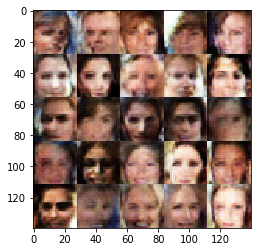

Epoch 1/1... Discriminator Loss: 1.4005... Generator Loss: 0.5039
Epoch 1/1... Discriminator Loss: 1.1346... Generator Loss: 0.6744
Epoch 1/1... Discriminator Loss: 1.1885... Generator Loss: 0.8609
Epoch 1/1... Discriminator Loss: 1.1942... Generator Loss: 0.7840
Epoch 1/1... Discriminator Loss: 1.2913... Generator Loss: 0.7113
Epoch 1/1... Discriminator Loss: 1.1806... Generator Loss: 0.6968
Epoch 1/1... Discriminator Loss: 1.5039... Generator Loss: 0.5671
Epoch 1/1... Discriminator Loss: 1.3025... Generator Loss: 0.7772
Epoch 1/1... Discriminator Loss: 1.3174... Generator Loss: 0.7512
Epoch 1/1... Discriminator Loss: 1.3151... Generator Loss: 0.6702


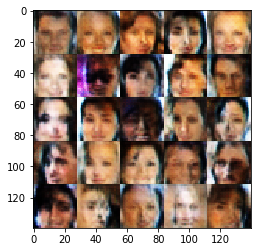

Epoch 1/1... Discriminator Loss: 1.2469... Generator Loss: 0.7589
Epoch 1/1... Discriminator Loss: 1.3851... Generator Loss: 0.6881
Epoch 1/1... Discriminator Loss: 1.3008... Generator Loss: 0.8173
Epoch 1/1... Discriminator Loss: 1.2012... Generator Loss: 0.6585
Epoch 1/1... Discriminator Loss: 1.3684... Generator Loss: 1.0180
Epoch 1/1... Discriminator Loss: 1.3571... Generator Loss: 0.8614
Epoch 1/1... Discriminator Loss: 1.2982... Generator Loss: 0.8889
Epoch 1/1... Discriminator Loss: 1.2591... Generator Loss: 0.8920
Epoch 1/1... Discriminator Loss: 1.3083... Generator Loss: 0.6638
Epoch 1/1... Discriminator Loss: 1.5137... Generator Loss: 0.6888


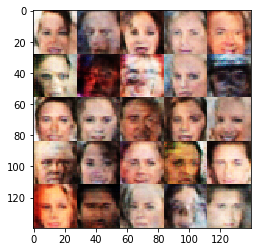

Epoch 1/1... Discriminator Loss: 1.3708... Generator Loss: 0.4707
Epoch 1/1... Discriminator Loss: 1.2439... Generator Loss: 0.6358
Epoch 1/1... Discriminator Loss: 1.1110... Generator Loss: 0.7360
Epoch 1/1... Discriminator Loss: 1.2797... Generator Loss: 0.6287
Epoch 1/1... Discriminator Loss: 1.3930... Generator Loss: 0.6139
Epoch 1/1... Discriminator Loss: 1.3552... Generator Loss: 0.6402
Epoch 1/1... Discriminator Loss: 1.4981... Generator Loss: 0.5370
Epoch 1/1... Discriminator Loss: 1.1909... Generator Loss: 0.6687
Epoch 1/1... Discriminator Loss: 1.1466... Generator Loss: 0.8354
Epoch 1/1... Discriminator Loss: 1.5437... Generator Loss: 1.5362


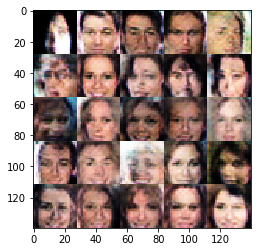

Epoch 1/1... Discriminator Loss: 1.3244... Generator Loss: 0.8593
Epoch 1/1... Discriminator Loss: 1.4787... Generator Loss: 0.4829
Epoch 1/1... Discriminator Loss: 1.2344... Generator Loss: 0.7611
Epoch 1/1... Discriminator Loss: 1.2638... Generator Loss: 0.7342
Epoch 1/1... Discriminator Loss: 1.3522... Generator Loss: 0.6499
Epoch 1/1... Discriminator Loss: 1.1899... Generator Loss: 0.6462
Epoch 1/1... Discriminator Loss: 1.2416... Generator Loss: 0.7398
Epoch 1/1... Discriminator Loss: 1.3645... Generator Loss: 0.6098
Epoch 1/1... Discriminator Loss: 1.3114... Generator Loss: 0.6494
Epoch 1/1... Discriminator Loss: 1.3951... Generator Loss: 0.7164


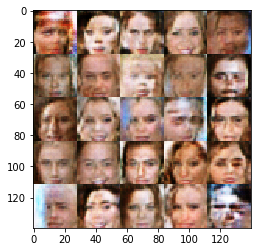

Epoch 1/1... Discriminator Loss: 1.0594... Generator Loss: 0.7812
Epoch 1/1... Discriminator Loss: 1.3716... Generator Loss: 0.5390
Epoch 1/1... Discriminator Loss: 1.3876... Generator Loss: 0.5795
Epoch 1/1... Discriminator Loss: 1.3586... Generator Loss: 0.5637
Epoch 1/1... Discriminator Loss: 1.3688... Generator Loss: 0.4664
Epoch 1/1... Discriminator Loss: 1.3958... Generator Loss: 0.6181
Epoch 1/1... Discriminator Loss: 1.4938... Generator Loss: 0.5901
Epoch 1/1... Discriminator Loss: 1.2654... Generator Loss: 0.9028
Epoch 1/1... Discriminator Loss: 1.2337... Generator Loss: 0.8849
Epoch 1/1... Discriminator Loss: 1.2550... Generator Loss: 0.8253


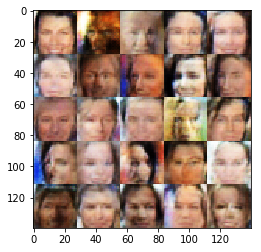

Epoch 1/1... Discriminator Loss: 1.5538... Generator Loss: 0.3931
Epoch 1/1... Discriminator Loss: 1.2755... Generator Loss: 0.6792
Epoch 1/1... Discriminator Loss: 1.1827... Generator Loss: 0.8509
Epoch 1/1... Discriminator Loss: 1.5116... Generator Loss: 0.5631
Epoch 1/1... Discriminator Loss: 1.4018... Generator Loss: 0.5667
Epoch 1/1... Discriminator Loss: 1.2765... Generator Loss: 0.7302
Epoch 1/1... Discriminator Loss: 1.3169... Generator Loss: 0.7697
Epoch 1/1... Discriminator Loss: 1.4040... Generator Loss: 0.6916
Epoch 1/1... Discriminator Loss: 1.2711... Generator Loss: 0.7401
Epoch 1/1... Discriminator Loss: 1.4215... Generator Loss: 0.7585


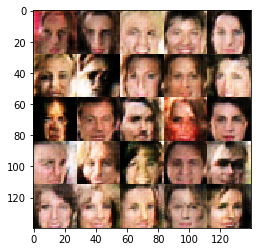

Epoch 1/1... Discriminator Loss: 1.2982... Generator Loss: 0.8178
Epoch 1/1... Discriminator Loss: 1.2875... Generator Loss: 0.6455
Epoch 1/1... Discriminator Loss: 1.4086... Generator Loss: 0.5472
Epoch 1/1... Discriminator Loss: 1.4787... Generator Loss: 0.5830
Epoch 1/1... Discriminator Loss: 1.4322... Generator Loss: 0.4828
Epoch 1/1... Discriminator Loss: 1.3220... Generator Loss: 0.7981
Epoch 1/1... Discriminator Loss: 1.4344... Generator Loss: 0.5436
Epoch 1/1... Discriminator Loss: 1.2894... Generator Loss: 0.6192
Epoch 1/1... Discriminator Loss: 1.2803... Generator Loss: 0.8815
Epoch 1/1... Discriminator Loss: 1.2843... Generator Loss: 0.8880


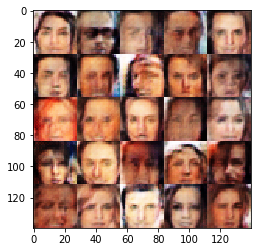

Epoch 1/1... Discriminator Loss: 1.2712... Generator Loss: 0.6689
Epoch 1/1... Discriminator Loss: 1.2373... Generator Loss: 0.6209
Epoch 1/1... Discriminator Loss: 1.4231... Generator Loss: 0.6450
Epoch 1/1... Discriminator Loss: 1.3418... Generator Loss: 0.4029
Epoch 1/1... Discriminator Loss: 1.3524... Generator Loss: 0.6911
Epoch 1/1... Discriminator Loss: 1.2945... Generator Loss: 0.6161
Epoch 1/1... Discriminator Loss: 1.2015... Generator Loss: 0.7417
Epoch 1/1... Discriminator Loss: 1.2909... Generator Loss: 0.6945
Epoch 1/1... Discriminator Loss: 1.2948... Generator Loss: 0.7445
Epoch 1/1... Discriminator Loss: 1.1769... Generator Loss: 0.6627


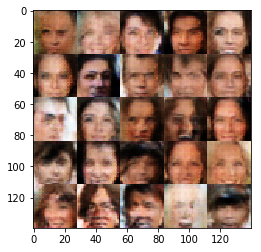

Epoch 1/1... Discriminator Loss: 1.4282... Generator Loss: 0.6441
Epoch 1/1... Discriminator Loss: 1.4039... Generator Loss: 0.6425
Epoch 1/1... Discriminator Loss: 1.2889... Generator Loss: 0.6191
Epoch 1/1... Discriminator Loss: 1.5730... Generator Loss: 0.9230
Epoch 1/1... Discriminator Loss: 1.2786... Generator Loss: 0.6730
Epoch 1/1... Discriminator Loss: 1.3612... Generator Loss: 0.5360
Epoch 1/1... Discriminator Loss: 1.3021... Generator Loss: 0.7007
Epoch 1/1... Discriminator Loss: 1.2701... Generator Loss: 0.7290
Epoch 1/1... Discriminator Loss: 1.1521... Generator Loss: 0.6479
Epoch 1/1... Discriminator Loss: 1.3727... Generator Loss: 0.5998


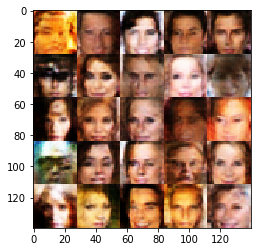

Epoch 1/1... Discriminator Loss: 1.3067... Generator Loss: 0.7655
Epoch 1/1... Discriminator Loss: 1.3344... Generator Loss: 0.7490
Epoch 1/1... Discriminator Loss: 1.2555... Generator Loss: 0.6750
Epoch 1/1... Discriminator Loss: 1.2751... Generator Loss: 0.7299
Epoch 1/1... Discriminator Loss: 1.4065... Generator Loss: 0.5774
Epoch 1/1... Discriminator Loss: 1.1625... Generator Loss: 0.8505
Epoch 1/1... Discriminator Loss: 1.4652... Generator Loss: 0.4235
Epoch 1/1... Discriminator Loss: 1.2722... Generator Loss: 0.7201
Epoch 1/1... Discriminator Loss: 1.3126... Generator Loss: 0.6267
Epoch 1/1... Discriminator Loss: 1.3623... Generator Loss: 0.9062


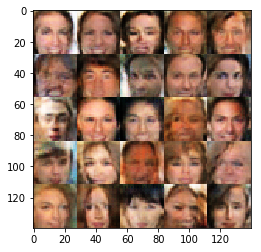

Epoch 1/1... Discriminator Loss: 1.2684... Generator Loss: 0.6198
Epoch 1/1... Discriminator Loss: 1.3496... Generator Loss: 0.6557
Epoch 1/1... Discriminator Loss: 1.2726... Generator Loss: 0.6838
Epoch 1/1... Discriminator Loss: 1.5155... Generator Loss: 0.5223
Epoch 1/1... Discriminator Loss: 1.3512... Generator Loss: 0.6401
Epoch 1/1... Discriminator Loss: 1.3271... Generator Loss: 0.7535
Epoch 1/1... Discriminator Loss: 1.4108... Generator Loss: 0.5012
Epoch 1/1... Discriminator Loss: 1.1225... Generator Loss: 0.7635
Epoch 1/1... Discriminator Loss: 1.3423... Generator Loss: 0.6633
Epoch 1/1... Discriminator Loss: 1.2443... Generator Loss: 0.7090


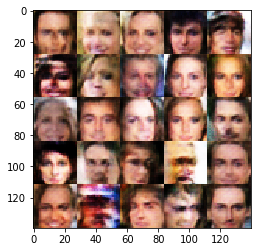

Epoch 1/1... Discriminator Loss: 1.2487... Generator Loss: 0.6939
Epoch 1/1... Discriminator Loss: 1.2514... Generator Loss: 0.8498
Epoch 1/1... Discriminator Loss: 1.3509... Generator Loss: 0.7575
Epoch 1/1... Discriminator Loss: 1.2745... Generator Loss: 0.6729
Epoch 1/1... Discriminator Loss: 1.3504... Generator Loss: 0.4944
Epoch 1/1... Discriminator Loss: 1.3289... Generator Loss: 0.6230
Epoch 1/1... Discriminator Loss: 1.3399... Generator Loss: 0.4913
Epoch 1/1... Discriminator Loss: 1.4177... Generator Loss: 0.6147
Epoch 1/1... Discriminator Loss: 1.2576... Generator Loss: 0.6960
Epoch 1/1... Discriminator Loss: 1.3519... Generator Loss: 0.5657


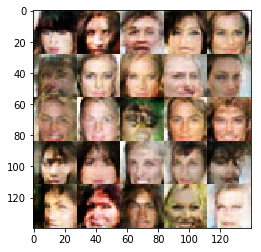

Epoch 1/1... Discriminator Loss: 1.3303... Generator Loss: 0.5402
Epoch 1/1... Discriminator Loss: 1.5019... Generator Loss: 0.5632
Epoch 1/1... Discriminator Loss: 1.4214... Generator Loss: 0.8469
Epoch 1/1... Discriminator Loss: 1.2184... Generator Loss: 0.8938
Epoch 1/1... Discriminator Loss: 1.3828... Generator Loss: 0.6187
Epoch 1/1... Discriminator Loss: 1.3754... Generator Loss: 0.5760
Epoch 1/1... Discriminator Loss: 1.2820... Generator Loss: 0.5976
Epoch 1/1... Discriminator Loss: 1.2918... Generator Loss: 0.6983
Epoch 1/1... Discriminator Loss: 1.2837... Generator Loss: 0.7184
Epoch 1/1... Discriminator Loss: 1.3705... Generator Loss: 0.7499


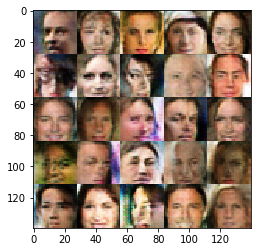

Epoch 1/1... Discriminator Loss: 1.3605... Generator Loss: 0.5696
Epoch 1/1... Discriminator Loss: 1.4224... Generator Loss: 0.6989
Epoch 1/1... Discriminator Loss: 1.3431... Generator Loss: 0.7078
Epoch 1/1... Discriminator Loss: 1.2868... Generator Loss: 0.7004
Epoch 1/1... Discriminator Loss: 1.2858... Generator Loss: 0.9089
Epoch 1/1... Discriminator Loss: 1.3076... Generator Loss: 0.7384
Epoch 1/1... Discriminator Loss: 1.2519... Generator Loss: 0.7802
Epoch 1/1... Discriminator Loss: 1.2969... Generator Loss: 0.7916
Epoch 1/1... Discriminator Loss: 1.2791... Generator Loss: 0.8010
Epoch 1/1... Discriminator Loss: 1.2578... Generator Loss: 0.7159


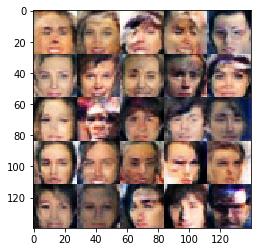

Epoch 1/1... Discriminator Loss: 1.3099... Generator Loss: 0.5673
Epoch 1/1... Discriminator Loss: 1.2924... Generator Loss: 0.6767
Epoch 1/1... Discriminator Loss: 1.5242... Generator Loss: 0.5111
Epoch 1/1... Discriminator Loss: 1.3445... Generator Loss: 0.6157
Epoch 1/1... Discriminator Loss: 1.1934... Generator Loss: 0.7129
Epoch 1/1... Discriminator Loss: 1.3710... Generator Loss: 0.6926
Epoch 1/1... Discriminator Loss: 1.3680... Generator Loss: 0.5907
Epoch 1/1... Discriminator Loss: 1.2801... Generator Loss: 0.6264
Epoch 1/1... Discriminator Loss: 1.4753... Generator Loss: 0.4593
Epoch 1/1... Discriminator Loss: 1.1539... Generator Loss: 0.8173


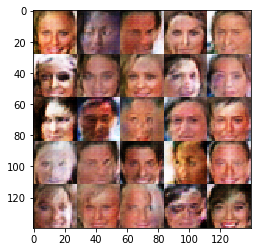

Epoch 1/1... Discriminator Loss: 1.5299... Generator Loss: 0.4872
Epoch 1/1... Discriminator Loss: 1.2551... Generator Loss: 0.7303
Epoch 1/1... Discriminator Loss: 1.2489... Generator Loss: 0.7503
Epoch 1/1... Discriminator Loss: 1.3281... Generator Loss: 0.6383
Epoch 1/1... Discriminator Loss: 1.3584... Generator Loss: 0.6065
Epoch 1/1... Discriminator Loss: 1.1961... Generator Loss: 0.6912
Epoch 1/1... Discriminator Loss: 1.3519... Generator Loss: 0.6914
Epoch 1/1... Discriminator Loss: 1.4578... Generator Loss: 0.5622
Epoch 1/1... Discriminator Loss: 1.3542... Generator Loss: 0.7224
Epoch 1/1... Discriminator Loss: 1.3432... Generator Loss: 0.7971


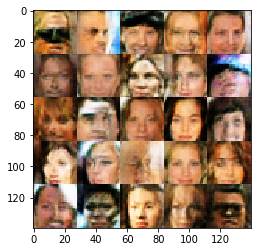

Epoch 1/1... Discriminator Loss: 1.2427... Generator Loss: 0.6022
Epoch 1/1... Discriminator Loss: 1.4118... Generator Loss: 0.5333
Epoch 1/1... Discriminator Loss: 1.1929... Generator Loss: 0.7349
Epoch 1/1... Discriminator Loss: 1.3660... Generator Loss: 0.5517
Epoch 1/1... Discriminator Loss: 1.3710... Generator Loss: 0.7582
Epoch 1/1... Discriminator Loss: 1.3120... Generator Loss: 0.6881
Epoch 1/1... Discriminator Loss: 1.3741... Generator Loss: 0.5537
Epoch 1/1... Discriminator Loss: 1.3292... Generator Loss: 0.7449
Epoch 1/1... Discriminator Loss: 1.3457... Generator Loss: 0.6270
Epoch 1/1... Discriminator Loss: 1.2683... Generator Loss: 0.8450


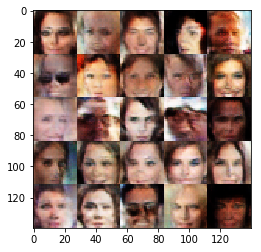

Epoch 1/1... Discriminator Loss: 1.3665... Generator Loss: 0.6552
Epoch 1/1... Discriminator Loss: 1.4622... Generator Loss: 0.9478
Epoch 1/1... Discriminator Loss: 1.3505... Generator Loss: 0.6941
Epoch 1/1... Discriminator Loss: 1.4600... Generator Loss: 0.6230
Epoch 1/1... Discriminator Loss: 1.3247... Generator Loss: 0.5289
Epoch 1/1... Discriminator Loss: 1.3028... Generator Loss: 0.5734
Epoch 1/1... Discriminator Loss: 1.2264... Generator Loss: 0.5577
Epoch 1/1... Discriminator Loss: 1.2163... Generator Loss: 0.7460
Epoch 1/1... Discriminator Loss: 1.3303... Generator Loss: 0.7994
Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.6076


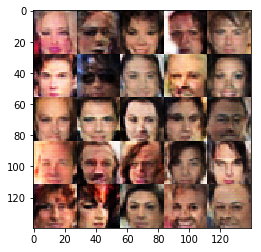

Epoch 1/1... Discriminator Loss: 1.3756... Generator Loss: 0.5847
Epoch 1/1... Discriminator Loss: 1.3159... Generator Loss: 0.6302
Epoch 1/1... Discriminator Loss: 1.2907... Generator Loss: 0.7808
Epoch 1/1... Discriminator Loss: 1.3533... Generator Loss: 0.5381
Epoch 1/1... Discriminator Loss: 1.2883... Generator Loss: 0.7877
Epoch 1/1... Discriminator Loss: 1.3470... Generator Loss: 0.7198
Epoch 1/1... Discriminator Loss: 1.2845... Generator Loss: 0.7772
Epoch 1/1... Discriminator Loss: 1.3019... Generator Loss: 0.4868
Epoch 1/1... Discriminator Loss: 1.4738... Generator Loss: 0.8799
Epoch 1/1... Discriminator Loss: 1.3238... Generator Loss: 0.6040


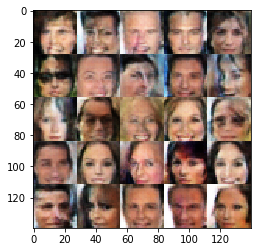

Epoch 1/1... Discriminator Loss: 1.3159... Generator Loss: 0.6753
Epoch 1/1... Discriminator Loss: 1.3328... Generator Loss: 0.9298
Epoch 1/1... Discriminator Loss: 1.2908... Generator Loss: 0.7647
Epoch 1/1... Discriminator Loss: 1.3248... Generator Loss: 0.7327
Epoch 1/1... Discriminator Loss: 1.2062... Generator Loss: 0.7475
Epoch 1/1... Discriminator Loss: 1.2527... Generator Loss: 0.7656
Epoch 1/1... Discriminator Loss: 1.3382... Generator Loss: 0.8367
Epoch 1/1... Discriminator Loss: 1.3387... Generator Loss: 0.6584
Epoch 1/1... Discriminator Loss: 1.2840... Generator Loss: 0.7213
Epoch 1/1... Discriminator Loss: 1.4611... Generator Loss: 1.2978


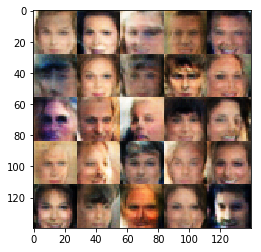

Epoch 1/1... Discriminator Loss: 1.3064... Generator Loss: 0.7303
Epoch 1/1... Discriminator Loss: 1.5075... Generator Loss: 0.4337
Epoch 1/1... Discriminator Loss: 1.3005... Generator Loss: 0.8272
Epoch 1/1... Discriminator Loss: 1.2673... Generator Loss: 0.7301
Epoch 1/1... Discriminator Loss: 1.2277... Generator Loss: 0.8866
Epoch 1/1... Discriminator Loss: 1.2750... Generator Loss: 0.7453
Epoch 1/1... Discriminator Loss: 1.4286... Generator Loss: 0.7339
Epoch 1/1... Discriminator Loss: 1.3043... Generator Loss: 0.6875
Epoch 1/1... Discriminator Loss: 1.3808... Generator Loss: 0.5550
Epoch 1/1... Discriminator Loss: 1.4351... Generator Loss: 0.6425


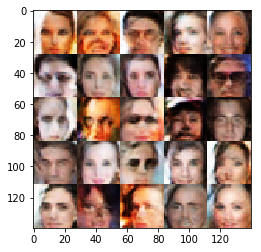

Epoch 1/1... Discriminator Loss: 1.3351... Generator Loss: 1.0100
Epoch 1/1... Discriminator Loss: 1.2966... Generator Loss: 0.6544
Epoch 1/1... Discriminator Loss: 1.2459... Generator Loss: 0.7805
Epoch 1/1... Discriminator Loss: 1.3071... Generator Loss: 0.9504
Epoch 1/1... Discriminator Loss: 1.3931... Generator Loss: 0.8849
Epoch 1/1... Discriminator Loss: 1.3852... Generator Loss: 0.6797
Epoch 1/1... Discriminator Loss: 1.2274... Generator Loss: 0.6754
Epoch 1/1... Discriminator Loss: 1.3437... Generator Loss: 0.8944
Epoch 1/1... Discriminator Loss: 1.4202... Generator Loss: 0.5679
Epoch 1/1... Discriminator Loss: 1.4636... Generator Loss: 0.6320


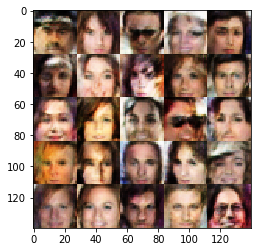

Epoch 1/1... Discriminator Loss: 1.2669... Generator Loss: 0.8276
Epoch 1/1... Discriminator Loss: 1.3933... Generator Loss: 0.6691
Epoch 1/1... Discriminator Loss: 1.2894... Generator Loss: 0.6689
Epoch 1/1... Discriminator Loss: 1.2649... Generator Loss: 0.6514
Epoch 1/1... Discriminator Loss: 1.2835... Generator Loss: 0.8293
Epoch 1/1... Discriminator Loss: 1.3328... Generator Loss: 0.7249
Epoch 1/1... Discriminator Loss: 1.3148... Generator Loss: 0.5868
Epoch 1/1... Discriminator Loss: 1.3247... Generator Loss: 0.6848
Epoch 1/1... Discriminator Loss: 1.6839... Generator Loss: 0.2696
Epoch 1/1... Discriminator Loss: 1.3958... Generator Loss: 0.6110


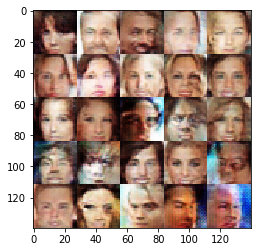

Epoch 1/1... Discriminator Loss: 1.4508... Generator Loss: 0.7118
Epoch 1/1... Discriminator Loss: 1.3708... Generator Loss: 0.7392
Epoch 1/1... Discriminator Loss: 1.2798... Generator Loss: 0.7218
Epoch 1/1... Discriminator Loss: 1.3248... Generator Loss: 0.6814
Epoch 1/1... Discriminator Loss: 1.2645... Generator Loss: 0.6862
Epoch 1/1... Discriminator Loss: 1.5775... Generator Loss: 0.5363
Epoch 1/1... Discriminator Loss: 1.3963... Generator Loss: 0.6672
Epoch 1/1... Discriminator Loss: 1.4126... Generator Loss: 0.7020
Epoch 1/1... Discriminator Loss: 1.2627... Generator Loss: 0.6764
Epoch 1/1... Discriminator Loss: 1.3244... Generator Loss: 0.6765


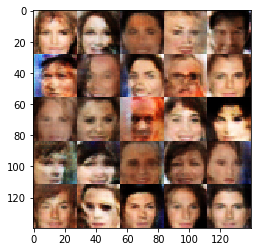

Epoch 1/1... Discriminator Loss: 1.2656... Generator Loss: 0.6488
Epoch 1/1... Discriminator Loss: 1.3093... Generator Loss: 0.8512
Epoch 1/1... Discriminator Loss: 1.4776... Generator Loss: 0.6192
Epoch 1/1... Discriminator Loss: 1.2928... Generator Loss: 0.6097
Epoch 1/1... Discriminator Loss: 1.2823... Generator Loss: 0.6836
Epoch 1/1... Discriminator Loss: 1.2982... Generator Loss: 0.8138
Epoch 1/1... Discriminator Loss: 1.2721... Generator Loss: 0.7125
Epoch 1/1... Discriminator Loss: 1.6399... Generator Loss: 0.3200
Epoch 1/1... Discriminator Loss: 1.4542... Generator Loss: 0.5459
Epoch 1/1... Discriminator Loss: 1.2769... Generator Loss: 0.7088


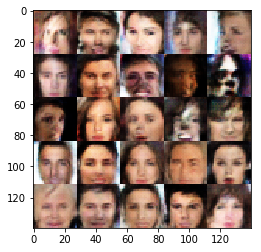

Epoch 1/1... Discriminator Loss: 1.4349... Generator Loss: 0.4469
Epoch 1/1... Discriminator Loss: 1.2897... Generator Loss: 0.7127
Epoch 1/1... Discriminator Loss: 1.2626... Generator Loss: 0.6718
Epoch 1/1... Discriminator Loss: 1.2402... Generator Loss: 0.8317
Epoch 1/1... Discriminator Loss: 1.3071... Generator Loss: 0.6264
Epoch 1/1... Discriminator Loss: 1.3894... Generator Loss: 0.5025
Epoch 1/1... Discriminator Loss: 1.3415... Generator Loss: 0.7025
Epoch 1/1... Discriminator Loss: 1.3834... Generator Loss: 0.6560
Epoch 1/1... Discriminator Loss: 1.2135... Generator Loss: 0.7119
Epoch 1/1... Discriminator Loss: 1.3206... Generator Loss: 0.6201


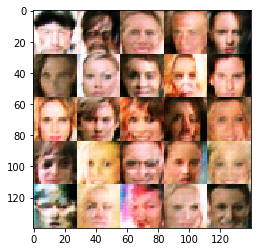

Epoch 1/1... Discriminator Loss: 1.3072... Generator Loss: 0.6474
Epoch 1/1... Discriminator Loss: 1.2680... Generator Loss: 0.6352
Epoch 1/1... Discriminator Loss: 1.3876... Generator Loss: 0.7183
Epoch 1/1... Discriminator Loss: 1.2255... Generator Loss: 0.6959
Epoch 1/1... Discriminator Loss: 1.3137... Generator Loss: 0.6315
Epoch 1/1... Discriminator Loss: 1.3471... Generator Loss: 0.6169
Epoch 1/1... Discriminator Loss: 1.2574... Generator Loss: 0.8238
Epoch 1/1... Discriminator Loss: 1.2881... Generator Loss: 0.8055
Epoch 1/1... Discriminator Loss: 1.3361... Generator Loss: 0.5875
Epoch 1/1... Discriminator Loss: 1.2994... Generator Loss: 0.6311


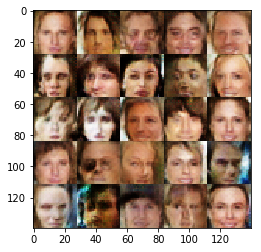

Epoch 1/1... Discriminator Loss: 1.3232... Generator Loss: 0.7186
Epoch 1/1... Discriminator Loss: 1.3865... Generator Loss: 0.5502
Epoch 1/1... Discriminator Loss: 1.3118... Generator Loss: 0.8053
Epoch 1/1... Discriminator Loss: 1.2592... Generator Loss: 0.7255
Epoch 1/1... Discriminator Loss: 1.2741... Generator Loss: 0.9725
Epoch 1/1... Discriminator Loss: 1.3586... Generator Loss: 0.7557
Epoch 1/1... Discriminator Loss: 1.3462... Generator Loss: 0.6632
Epoch 1/1... Discriminator Loss: 1.3592... Generator Loss: 0.7061
Epoch 1/1... Discriminator Loss: 1.3107... Generator Loss: 0.7146
Epoch 1/1... Discriminator Loss: 1.4552... Generator Loss: 0.3870


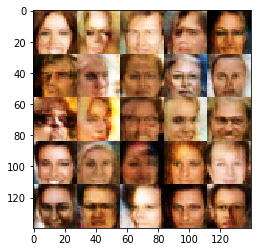

Epoch 1/1... Discriminator Loss: 1.3606... Generator Loss: 0.6948
Epoch 1/1... Discriminator Loss: 1.3926... Generator Loss: 0.5884
Epoch 1/1... Discriminator Loss: 1.3921... Generator Loss: 0.5593
Epoch 1/1... Discriminator Loss: 1.2857... Generator Loss: 0.6485
Epoch 1/1... Discriminator Loss: 1.3205... Generator Loss: 0.6833
Epoch 1/1... Discriminator Loss: 1.3164... Generator Loss: 0.7058
Epoch 1/1... Discriminator Loss: 1.4066... Generator Loss: 0.5614
Epoch 1/1... Discriminator Loss: 1.3105... Generator Loss: 0.8736
Epoch 1/1... Discriminator Loss: 1.2417... Generator Loss: 0.7259
Epoch 1/1... Discriminator Loss: 1.2775... Generator Loss: 0.8775


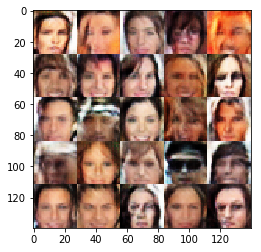

Epoch 1/1... Discriminator Loss: 1.3251... Generator Loss: 0.5989
Epoch 1/1... Discriminator Loss: 1.2579... Generator Loss: 0.7768
Epoch 1/1... Discriminator Loss: 1.2525... Generator Loss: 0.6739


In [14]:
batch_size = 32
z_dim = 100
learning_rate = 0.005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.